# РАЗДЕЛ 2. Сравнительный анализ различных алгоритмов машинного обучения для решения задачи прогнозирования свойств композитных материалов и выбор наиболее оптимальной модели

In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, ARDRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline 
sns.set(style="ticks")

Для сравнительного анализа возьмем следующие алгоритмы машинного обучения:
1. Модель линейной регрессии
2. Модель Ridge
3. Модель Lasso
4. Модель ElasticNet
5. Модель BayesianRidge
6. Модель GradientBoostingRegressor
7. Модель KNeighborsRegressor
8. Decision Tree Regressor
9. AdaBoostRegressor
10. Полносвязная нейронная сеть

В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (mae) 

In [62]:
# объект для хранения оценок различных моделей
# под y1 - закодирован целевой признак "Модуль упругости при растяжении, ГПа"
# под y2 - закодирован целевой признак "Прочность при растяжении, МПа"

modelsMAE_y1=[]
modelsMAE_y2=[]

In [63]:
# Подготовка данных для обучения
path_1 = r'./Data/X.xlsx'
X = pd.read_excel(path_1,index_col=0)
X.head()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0


In [201]:
path_2 = r'./Data/y.xlsx'
y = pd.read_excel(path_2,index_col=0)
y1 = y.drop(columns='Прочность при растяжении, МПа')
y2 = y.drop(columns='Модуль упругости при растяжении, ГПа')
y2.head()

,"Прочность при растяжении, МПа"
0,3000.0
1,3000.0
2,3000.0
3,3000.0
4,3000.0


In [202]:
# стандартизация  данных
scaler_std = StandardScaler()
scaler_std.fit(X)
Xstd = pd.DataFrame (data =scaler_std.transform(X), columns=X.columns)
scaler_std_y = StandardScaler()
scaler_std_y.fit(y)
ystd = pd.DataFrame (data = scaler_std_y.transform(y), columns=y.columns)

In [204]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
Xnorm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
ynorm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [278]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Xnorm,ynorm, test_size=0.2, random_state=42, shuffle=True)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(Xstd,ystd, test_size=0.2, random_state=42, shuffle=True)

In [86]:
# модель линейной регрессии тренируем на исходных данных
modelLinReg = LinearRegression()
modelLinReg.fit(X_train,y_train)
y_pred = modelLinReg.predict(X_test)
MAELinReg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAELinReg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAELinReg_1)
print (MAELinReg_2)

2.4570126521995137
363.55474768882664


In [89]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['LinearRegression',MAELinReg_1])
modelsMAE_y2.append(['LinearRegression',MAELinReg_2])

In [115]:
# модель линейной регрессии Ridge тренируем на исходных данных
modelRidge = Ridge(alpha=1500.0)
modelRidge.fit(X_train,y_train)
y_pred = modelRidge.predict(X_test)
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)

2.454899900202636
362.54450049496216


In [213]:
# модель линейной регрессии Ridge тренируем на нормализованных данных
modelRidge = Ridge(alpha=16.0)
modelRidge.fit(X_train_norm,y_train_norm)
print (modelRidge.predict(X_test_norm).shape)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)

(205, 2)
2.453134865612972
362.0590088523017


In [141]:
# модель линейной регрессии Ridge тренируем на стандартизованных данных данных
modelRidge = Ridge(alpha=1000)
modelRidge.fit(X_train_std,y_train_std)
y_pred =  scaler_std_y.inverse_transform (modelRidge.predict(X_test_std))
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)

2.4542051769516413
362.77588752747084


In [142]:
modelsMAE_y1.append(['Ridge',MAERidge_1])
modelsMAE_y2.append(['Ridge',MAERidge_2])


In [155]:
# модель линейной регрессии Lasso тренируем на исходных данных
modelLasso = Lasso(alpha=0.1)
modelLasso.fit(X_train,y_train)
y_pred = modelLasso.predict(X_test)
MAELasso_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAELasso_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])

print (MAELasso_1)
print (MAELasso_2)

2.452590505439797
363.54454610061686


In [156]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['Lasso',MAELasso_1])
modelsMAE_y2.append(['Lasso',MAELasso_2])

In [165]:
# модель линейной регрессии ElasticNet тренируем на исходных данных
modelElastic = ElasticNet(alpha=0.1, l1_ratio=0.9)
modelElastic.fit(X_train,y_train)
y_pred = modelElastic.predict(X_test)
MAEElastic_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEElastic_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])

print (MAEElastic_1)
print (MAEElastic_2)

2.4525476151577124
363.52495016846393


In [166]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['ElasticNet',MAEElastic_1])
modelsMAE_y2.append(['ElasticNet',MAEElastic_2])

In [186]:
# модель регрессии BayesianRidge тренируем на исходных данных
modelBay_1=BayesianRidge()
modelBay_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelBay_1.predict(X_test)
MAEBay_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelBay_2 = BayesianRidge()
modelBay_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelBay_2.predict(X_test)
MAEBay_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)

print (MAEBay_1)
print (MAEBay_2)

2.454319535374178
364.07105847820554


In [187]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['BayesianRidge',MAEBay_1])
modelsMAE_y2.append(['BayesianRidge',MAEBay_2])

In [304]:
# модель регрессии GradientBoostingRegressor тренируем на исходных данных
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelGBR_1.predict(X_test)
MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelGBR_2.predict(X_test)
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)

print (MAEGBR_1)
print (MAEGBR_2)

2.5316309103150085
380.0961190096954


In [243]:
# модель регрессии GradientBoostingRegressor тренируем на нормализованных данных
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelGBR_1.predict(X_test_norm)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelGBR_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEGBR_1)
print (MAEGBR_2)

2.52134695925796
379.82889204532313


In [244]:
# модель регрессии GradientBoostingRegressor тренируем на стандартизованных данных
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelGBR_1.predict(X_test_std)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelGBR_2.predict(X_test_std)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEGBR_1)
print (MAEGBR_2)

2.5179034756745784
380.4014683013796


In [229]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['GradientBoostingRegressor',MAEGBR_1])
modelsMAE_y2.append(['GradientBoostingRegressor',MAEGBR_2])

In [230]:
modelsMAE_y1

[['LinearRegression', 3.2148518086102125],
 ['Ridge', 2.4542051769516413],
 ['Lasso', 2.452590505439797],
 ['ElasticNet', 2.4525476151577124],
 ['BayesianRidge', 2.454319535374178],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.4995220645582243]]

In [282]:
# модель регрессии KNeighborsRegressor тренируем на исходных данных
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelNeihg_1.predict(X_test)
MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelNeihg_2 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelNeihg_2.predict(X_test)
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAENeihg_1)
print (MAENeihg_2)

2.4750601683308724
387.1123974074007


In [305]:
# модель регрессии KNeighborsRegressor тренируем на нормализованных данных
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm, y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)

2.6352295146049416
381.32649926670325


In [306]:
# модель регрессии KNeighborsRegressor тренируем на стандартизованных данных
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_std)
modelNeihg_2 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_2.fit(X_train_norm,y_train_std.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)

2.6139437178426084
378.6205332047536


In [283]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['KNeighborsRegressor',MAEGBR_1])
modelsMAE_y2.append(['KNeighborsRegressor',MAEGBR_2])

In [307]:
# модель регрессии DecisionTreeRegressor тренируем на исходных данных
modelTree_1 = DecisionTreeRegressor(max_depth=5)
modelTree_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelTree_1.predict(X_test)
MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelTree_2.predict(X_test)
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAETree_1)
print (MAETree_2)

2.6683578175053233
397.4978827822236


In [308]:
# модель регрессии DecisionTreeRegressor тренируем на нормализованных данных
modelTree_1 = DecisionTreeRegressor(max_depth=5)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,0])
print (MAETree_1)
print (MAETree_2)

2.694351990747137
2397.3821024247163


In [309]:
# модель регрессии DecisionTreeRegressor тренируем на стандартизованных данных
modelTree_1 = DecisionTreeRegressor(max_depth=5)
modelTree_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_std)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,0])
print (MAETree_1)
print (MAETree_2)

2.6943519907471365
2397.3821024247163


In [293]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['DecisionTreeRegressor',MAETree_1])
modelsMAE_y2.append(['DecisionTreeRegressor',MAETree_2])

In [310]:
# модель регрессии RandomForestRegressor тренируем на исходных данных
modelTree_1 = RandomForestRegressor(max_depth=5)
modelTree_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelTree_1.predict(X_test)
MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelTree_2 = RandomForestRegressor(max_depth=5)
modelTree_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelTree_2.predict(X_test)
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAETree_1)
print (MAETree_2)

2.4947496929950965
365.94093749884973


In [319]:
# модель регрессии RandomForestRegressor тренируем на нормализованных данных
modelTree_1 = RandomForestRegressor(max_depth=5)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = RandomForestRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)

2.4851192922963814
367.00658620723834


In [320]:
# модель регрессии RandomForestRegressor тренируем на стандартизованных данных
modelTree_1 = RandomForestRegressor(max_depth=5)
modelTree_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_std)

modelTree_2 = RandomForestRegressor(max_depth=5)
modelTree_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)

2.4907778925337363
366.16797375643154


In [293]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['RandomForestRegressor',MAETree_1])
modelsMAE_y2.append(['RandomForestRegressor',MAETree_2])

In [321]:
# модель регрессии AdaBoostRegressor тренируем на исходных данных
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test)
MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test)
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAEAda_1)
print (MAEAda_2)

2.639108232556576
388.58224449443037


In [339]:
# модель регрессии AdaBoostRegressor тренируем на нормализованных данных
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)

2.6184424264136497
385.801460880102


In [327]:
# модель регрессии AdaBoostRegressor тренируем на стандартизованных данных
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelAda_1.predict(X_test_std)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelAda_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)

2.6091567699490343
388.04977189643085


In [340]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['AdaBoostRegressor',MAEAda_1])
modelsMAE_y2.append(['AdaBoostRegressor',MAEAda_2])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                192       
                                                                 
 dense_61 (Dense)            (None, 32)                544       
                                                                 
 dense_62 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 - 0s - loss: 5403.9263 - mae: 73.4435 - val_loss: 5287.9800 - val_mae: 72.6581 - 476ms/epoch - 21ms/step
Epoch 2/200
23/23 - 0s - loss: 5287.6436 - mae: 72.6475 - val_loss: 5166.9219 - val_mae: 71.8201 - 78ms/epoch - 3ms/step
Epoch 3/200
23/23 - 0s - loss: 5163.7227 - mae: 71.7896 - val_loss: 5044.21

Epoch 62/200
23/23 - 0s - loss: 1382.9209 - mae: 37.0544 - val_loss: 1333.7142 - val_mae: 36.3994 - 40ms/epoch - 2ms/step
Epoch 63/200
23/23 - 0s - loss: 1345.4823 - mae: 36.5452 - val_loss: 1297.2732 - val_mae: 35.8953 - 40ms/epoch - 2ms/step
Epoch 64/200
23/23 - 0s - loss: 1309.1949 - mae: 36.0463 - val_loss: 1262.0682 - val_mae: 35.4016 - 41ms/epoch - 2ms/step
Epoch 65/200
23/23 - 0s - loss: 1274.1045 - mae: 35.5548 - val_loss: 1227.7635 - val_mae: 34.9137 - 40ms/epoch - 2ms/step
Epoch 66/200
23/23 - 0s - loss: 1239.9307 - mae: 35.0709 - val_loss: 1194.4611 - val_mae: 34.4335 - 40ms/epoch - 2ms/step
Epoch 67/200
23/23 - 0s - loss: 1206.6698 - mae: 34.5947 - val_loss: 1162.1124 - val_mae: 33.9605 - 42ms/epoch - 2ms/step
Epoch 68/200
23/23 - 0s - loss: 1174.3511 - mae: 34.1233 - val_loss: 1130.4967 - val_mae: 33.4918 - 40ms/epoch - 2ms/step
Epoch 69/200
23/23 - 0s - loss: 1142.7794 - mae: 33.6580 - val_loss: 1099.7271 - val_mae: 33.0292 - 40ms/epoch - 2ms/step
Epoch 70/200
23/23 - 0s 

Epoch 130/200
23/23 - 0s - loss: 119.6366 - mae: 10.4767 - val_loss: 106.7329 - val_mae: 9.8962 - 42ms/epoch - 2ms/step
Epoch 131/200
23/23 - 0s - loss: 112.2423 - mae: 10.1163 - val_loss: 99.9855 - val_mae: 9.5492 - 39ms/epoch - 2ms/step
Epoch 132/200
23/23 - 0s - loss: 105.5517 - mae: 9.7796 - val_loss: 93.8538 - val_mae: 9.2226 - 44ms/epoch - 2ms/step
Epoch 133/200
23/23 - 0s - loss: 99.3915 - mae: 9.4607 - val_loss: 88.1903 - val_mae: 8.9102 - 40ms/epoch - 2ms/step
Epoch 134/200
23/23 - 0s - loss: 93.6549 - mae: 9.1519 - val_loss: 82.8312 - val_mae: 8.6042 - 44ms/epoch - 2ms/step
Epoch 135/200
23/23 - 0s - loss: 88.1789 - mae: 8.8485 - val_loss: 77.7114 - val_mae: 8.3014 - 40ms/epoch - 2ms/step
Epoch 136/200
23/23 - 0s - loss: 82.8707 - mae: 8.5439 - val_loss: 72.6341 - val_mae: 7.9897 - 39ms/epoch - 2ms/step
Epoch 137/200
23/23 - 0s - loss: 77.5291 - mae: 8.2260 - val_loss: 67.4867 - val_mae: 7.6608 - 41ms/epoch - 2ms/step
Epoch 138/200
23/23 - 0s - loss: 72.0958 - mae: 7.8904 - v

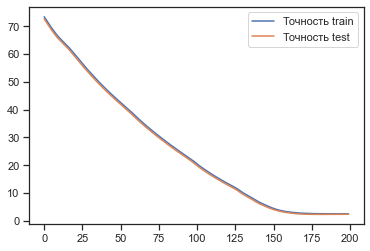

In [373]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на исходных данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train,y_train.iloc[:,0], 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [374]:
y_pred_1 = modelNN_y1.predict(X_test)
MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
print (MAENN_1)

7/7 [==============================] - 0s 951us/step
2.464840856602156


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 16)                192       
                                                                 
 dense_67 (Dense)            (None, 32)                544       
                                                                 
 dense_68 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4000
23/23 - 0s - loss: 6308464.5000 - mae: 2464.0625 - val_loss: 6435556.0000 - val_mae: 2482.9614 - 465ms/epoch - 20ms/step
Epoch 2/4000
23/23 - 0s - loss: 6304855.0000 - mae: 2463.3289 - val_loss: 6431859.0000 - val_mae: 2482.2175 - 47ms/epoch - 2ms/step
Epoch 3/4000
23/23 - 0s - loss: 6301091.5000 - mae: 2

Epoch 57/4000
23/23 - 0s - loss: 6105893.0000 - mae: 2422.6094 - val_loss: 6231191.5000 - val_mae: 2441.4607 - 42ms/epoch - 2ms/step
Epoch 58/4000
23/23 - 0s - loss: 6102073.5000 - mae: 2421.8147 - val_loss: 6227389.5000 - val_mae: 2440.6819 - 42ms/epoch - 2ms/step
Epoch 59/4000
23/23 - 0s - loss: 6098361.0000 - mae: 2421.0510 - val_loss: 6223709.0000 - val_mae: 2439.9277 - 38ms/epoch - 2ms/step
Epoch 60/4000
23/23 - 0s - loss: 6094719.5000 - mae: 2420.2993 - val_loss: 6220039.0000 - val_mae: 2439.1755 - 41ms/epoch - 2ms/step
Epoch 61/4000
23/23 - 0s - loss: 6091048.5000 - mae: 2419.5393 - val_loss: 6216281.0000 - val_mae: 2438.4053 - 39ms/epoch - 2ms/step
Epoch 62/4000
23/23 - 0s - loss: 6087231.5000 - mae: 2418.7520 - val_loss: 6212335.0000 - val_mae: 2437.5957 - 42ms/epoch - 2ms/step
Epoch 63/4000
23/23 - 0s - loss: 6083252.0000 - mae: 2417.9260 - val_loss: 6208267.0000 - val_mae: 2436.7612 - 39ms/epoch - 2ms/step
Epoch 64/4000
23/23 - 0s - loss: 6079232.5000 - mae: 2417.0967 - val_

Epoch 119/4000
23/23 - 0s - loss: 5864539.0000 - mae: 2372.2722 - val_loss: 5988043.5000 - val_mae: 2391.1467 - 45ms/epoch - 2ms/step
Epoch 120/4000
23/23 - 0s - loss: 5860942.5000 - mae: 2371.5120 - val_loss: 5984409.0000 - val_mae: 2390.3865 - 47ms/epoch - 2ms/step
Epoch 121/4000
23/23 - 0s - loss: 5857347.0000 - mae: 2370.7529 - val_loss: 5980784.0000 - val_mae: 2389.6279 - 40ms/epoch - 2ms/step
Epoch 122/4000
23/23 - 0s - loss: 5853752.5000 - mae: 2369.9968 - val_loss: 5977181.5000 - val_mae: 2388.8743 - 39ms/epoch - 2ms/step
Epoch 123/4000
23/23 - 0s - loss: 5850175.5000 - mae: 2369.2424 - val_loss: 5973570.0000 - val_mae: 2388.1182 - 39ms/epoch - 2ms/step
Epoch 124/4000
23/23 - 0s - loss: 5846601.5000 - mae: 2368.4854 - val_loss: 5969957.5000 - val_mae: 2387.3616 - 40ms/epoch - 2ms/step
Epoch 125/4000
23/23 - 0s - loss: 5843023.5000 - mae: 2367.7307 - val_loss: 5966367.0000 - val_mae: 2386.6096 - 37ms/epoch - 2ms/step
Epoch 126/4000
23/23 - 0s - loss: 5839463.0000 - mae: 2366.978

Epoch 181/4000
23/23 - 0s - loss: 5640234.5000 - mae: 2324.5134 - val_loss: 5761896.0000 - val_mae: 2343.3811 - 39ms/epoch - 2ms/step
Epoch 182/4000
23/23 - 0s - loss: 5636656.5000 - mae: 2323.7415 - val_loss: 5758293.5000 - val_mae: 2342.6123 - 39ms/epoch - 2ms/step
Epoch 183/4000
23/23 - 0s - loss: 5633087.0000 - mae: 2322.9744 - val_loss: 5754694.0000 - val_mae: 2341.8440 - 41ms/epoch - 2ms/step
Epoch 184/4000
23/23 - 0s - loss: 5629524.0000 - mae: 2322.2046 - val_loss: 5751094.5000 - val_mae: 2341.0752 - 40ms/epoch - 2ms/step
Epoch 185/4000
23/23 - 0s - loss: 5625950.5000 - mae: 2321.4412 - val_loss: 5747528.0000 - val_mae: 2340.3132 - 39ms/epoch - 2ms/step
Epoch 186/4000
23/23 - 0s - loss: 5622407.5000 - mae: 2320.6750 - val_loss: 5743935.0000 - val_mae: 2339.5457 - 38ms/epoch - 2ms/step
Epoch 187/4000
23/23 - 0s - loss: 5618856.5000 - mae: 2319.9080 - val_loss: 5740343.5000 - val_mae: 2338.7781 - 39ms/epoch - 2ms/step
Epoch 188/4000
23/23 - 0s - loss: 5615301.0000 - mae: 2319.142

Epoch 243/4000
23/23 - 0s - loss: 5424168.0000 - mae: 2277.5618 - val_loss: 5544092.0000 - val_mae: 2296.4387 - 38ms/epoch - 2ms/step
Epoch 244/4000
23/23 - 0s - loss: 5420735.5000 - mae: 2276.8105 - val_loss: 5540650.0000 - val_mae: 2295.6890 - 40ms/epoch - 2ms/step
Epoch 245/4000
23/23 - 0s - loss: 5417318.0000 - mae: 2276.0591 - val_loss: 5537201.5000 - val_mae: 2294.9380 - 39ms/epoch - 2ms/step
Epoch 246/4000
23/23 - 0s - loss: 5413901.0000 - mae: 2275.3064 - val_loss: 5533749.0000 - val_mae: 2294.1858 - 40ms/epoch - 2ms/step
Epoch 247/4000
23/23 - 0s - loss: 5410479.5000 - mae: 2274.5554 - val_loss: 5530306.0000 - val_mae: 2293.4353 - 39ms/epoch - 2ms/step
Epoch 248/4000
23/23 - 0s - loss: 5407064.5000 - mae: 2273.8054 - val_loss: 5526863.5000 - val_mae: 2292.6843 - 39ms/epoch - 2ms/step
Epoch 249/4000
23/23 - 0s - loss: 5403648.5000 - mae: 2273.0554 - val_loss: 5523426.5000 - val_mae: 2291.9348 - 39ms/epoch - 2ms/step
Epoch 250/4000
23/23 - 0s - loss: 5400238.5000 - mae: 2272.304

Epoch 305/4000
23/23 - 0s - loss: 5214598.5000 - mae: 2231.0852 - val_loss: 5332808.0000 - val_mae: 2249.9658 - 39ms/epoch - 2ms/step
Epoch 306/4000
23/23 - 0s - loss: 5211271.0000 - mae: 2230.3352 - val_loss: 5329428.0000 - val_mae: 2249.2146 - 38ms/epoch - 2ms/step
Epoch 307/4000
23/23 - 0s - loss: 5207926.5000 - mae: 2229.5857 - val_loss: 5326063.5000 - val_mae: 2248.4666 - 39ms/epoch - 2ms/step
Epoch 308/4000
23/23 - 0s - loss: 5204590.0000 - mae: 2228.8379 - val_loss: 5322699.0000 - val_mae: 2247.7183 - 38ms/epoch - 2ms/step
Epoch 309/4000
23/23 - 0s - loss: 5201262.5000 - mae: 2228.0874 - val_loss: 5319318.0000 - val_mae: 2246.9661 - 39ms/epoch - 2ms/step
Epoch 310/4000
23/23 - 0s - loss: 5197919.0000 - mae: 2227.3384 - val_loss: 5315962.0000 - val_mae: 2246.2192 - 38ms/epoch - 2ms/step
Epoch 311/4000
23/23 - 0s - loss: 5194580.5000 - mae: 2226.5928 - val_loss: 5312617.0000 - val_mae: 2245.4744 - 39ms/epoch - 2ms/step
Epoch 312/4000
23/23 - 0s - loss: 5191257.0000 - mae: 2225.844

Epoch 367/4000
23/23 - 0s - loss: 5009820.5000 - mae: 2184.7078 - val_loss: 5126269.0000 - val_mae: 2203.5896 - 40ms/epoch - 2ms/step
Epoch 368/4000
23/23 - 0s - loss: 5006567.0000 - mae: 2183.9573 - val_loss: 5122952.0000 - val_mae: 2202.8369 - 41ms/epoch - 2ms/step
Epoch 369/4000
23/23 - 0s - loss: 5003282.5000 - mae: 2183.2122 - val_loss: 5119682.5000 - val_mae: 2202.0945 - 38ms/epoch - 2ms/step
Epoch 370/4000
23/23 - 0s - loss: 5000028.0000 - mae: 2182.4673 - val_loss: 5116392.5000 - val_mae: 2201.3474 - 39ms/epoch - 2ms/step
Epoch 371/4000
23/23 - 0s - loss: 4996768.0000 - mae: 2181.7190 - val_loss: 5113094.0000 - val_mae: 2200.5984 - 38ms/epoch - 2ms/step
Epoch 372/4000
23/23 - 0s - loss: 4993507.0000 - mae: 2180.9690 - val_loss: 5109798.5000 - val_mae: 2199.8494 - 38ms/epoch - 2ms/step
Epoch 373/4000
23/23 - 0s - loss: 4990239.5000 - mae: 2180.2224 - val_loss: 5106522.5000 - val_mae: 2199.1042 - 38ms/epoch - 2ms/step
Epoch 374/4000
23/23 - 0s - loss: 4986984.0000 - mae: 2179.476

Epoch 429/4000
23/23 - 0s - loss: 4809503.5000 - mae: 2138.3711 - val_loss: 4924200.0000 - val_mae: 2157.2522 - 39ms/epoch - 2ms/step
Epoch 430/4000
23/23 - 0s - loss: 4806312.0000 - mae: 2137.6238 - val_loss: 4920977.0000 - val_mae: 2156.5051 - 38ms/epoch - 2ms/step
Epoch 431/4000
23/23 - 0s - loss: 4803116.0000 - mae: 2136.8777 - val_loss: 4917761.0000 - val_mae: 2155.7595 - 39ms/epoch - 2ms/step
Epoch 432/4000
23/23 - 0s - loss: 4799930.5000 - mae: 2136.1296 - val_loss: 4914527.0000 - val_mae: 2155.0090 - 39ms/epoch - 2ms/step
Epoch 433/4000
23/23 - 0s - loss: 4796735.0000 - mae: 2135.3794 - val_loss: 4911305.5000 - val_mae: 2154.2617 - 39ms/epoch - 2ms/step
Epoch 434/4000
23/23 - 0s - loss: 4793532.0000 - mae: 2134.6377 - val_loss: 4908112.5000 - val_mae: 2153.5203 - 39ms/epoch - 2ms/step
Epoch 435/4000
23/23 - 0s - loss: 4790365.5000 - mae: 2133.8875 - val_loss: 4904868.5000 - val_mae: 2152.7673 - 41ms/epoch - 2ms/step
Epoch 436/4000
23/23 - 0s - loss: 4787167.5000 - mae: 2133.138

Epoch 491/4000
23/23 - 0s - loss: 4613572.5000 - mae: 2092.0588 - val_loss: 4726533.5000 - val_mae: 2110.9409 - 40ms/epoch - 2ms/step
Epoch 492/4000
23/23 - 0s - loss: 4610451.5000 - mae: 2091.3140 - val_loss: 4723384.0000 - val_mae: 2110.1951 - 39ms/epoch - 2ms/step
Epoch 493/4000
23/23 - 0s - loss: 4607340.0000 - mae: 2090.5625 - val_loss: 4720210.5000 - val_mae: 2109.4426 - 39ms/epoch - 2ms/step
Epoch 494/4000
23/23 - 0s - loss: 4604205.5000 - mae: 2089.8149 - val_loss: 4717065.0000 - val_mae: 2108.6970 - 39ms/epoch - 2ms/step
Epoch 495/4000
23/23 - 0s - loss: 4601086.5000 - mae: 2089.0688 - val_loss: 4713917.5000 - val_mae: 2107.9507 - 38ms/epoch - 2ms/step
Epoch 496/4000
23/23 - 0s - loss: 4597967.0000 - mae: 2088.3228 - val_loss: 4710772.5000 - val_mae: 2107.2043 - 39ms/epoch - 2ms/step
Epoch 497/4000
23/23 - 0s - loss: 4594849.0000 - mae: 2087.5769 - val_loss: 4707624.5000 - val_mae: 2106.4573 - 38ms/epoch - 2ms/step
Epoch 498/4000
23/23 - 0s - loss: 4591728.0000 - mae: 2086.830

Epoch 553/4000
23/23 - 0s - loss: 4422017.5000 - mae: 2045.7626 - val_loss: 4533215.0000 - val_mae: 2064.6436 - 40ms/epoch - 2ms/step
Epoch 554/4000
23/23 - 0s - loss: 4418963.0000 - mae: 2045.0146 - val_loss: 4530128.5000 - val_mae: 2063.8960 - 39ms/epoch - 2ms/step
Epoch 555/4000
23/23 - 0s - loss: 4415902.5000 - mae: 2044.2712 - val_loss: 4527060.0000 - val_mae: 2063.1523 - 38ms/epoch - 2ms/step
Epoch 556/4000
23/23 - 0s - loss: 4412856.5000 - mae: 2043.5248 - val_loss: 4523976.0000 - val_mae: 2062.4050 - 38ms/epoch - 2ms/step
Epoch 557/4000
23/23 - 0s - loss: 4409806.0000 - mae: 2042.7765 - val_loss: 4520893.0000 - val_mae: 2061.6575 - 39ms/epoch - 2ms/step
Epoch 558/4000
23/23 - 0s - loss: 4406752.5000 - mae: 2042.0300 - val_loss: 4517820.5000 - val_mae: 2060.9121 - 50ms/epoch - 2ms/step
Epoch 559/4000
23/23 - 0s - loss: 4403704.0000 - mae: 2041.2855 - val_loss: 4514747.5000 - val_mae: 2060.1663 - 39ms/epoch - 2ms/step
Epoch 560/4000
23/23 - 0s - loss: 4400661.5000 - mae: 2040.536

Epoch 615/4000
23/23 - 0s - loss: 4234800.5000 - mae: 1999.4866 - val_loss: 4344277.5000 - val_mae: 2018.3695 - 40ms/epoch - 2ms/step
Epoch 616/4000
23/23 - 0s - loss: 4231837.0000 - mae: 1998.7371 - val_loss: 4341242.0000 - val_mae: 2017.6174 - 38ms/epoch - 2ms/step
Epoch 617/4000
23/23 - 0s - loss: 4228840.5000 - mae: 1997.9908 - val_loss: 4338241.0000 - val_mae: 2016.8737 - 38ms/epoch - 2ms/step
Epoch 618/4000
23/23 - 0s - loss: 4225863.0000 - mae: 1997.2465 - val_loss: 4335233.0000 - val_mae: 2016.1278 - 39ms/epoch - 2ms/step
Epoch 619/4000
23/23 - 0s - loss: 4222879.5000 - mae: 1996.5010 - val_loss: 4332232.0000 - val_mae: 2015.3834 - 38ms/epoch - 2ms/step
Epoch 620/4000
23/23 - 0s - loss: 4219908.0000 - mae: 1995.7532 - val_loss: 4329215.0000 - val_mae: 2014.6348 - 39ms/epoch - 2ms/step
Epoch 621/4000
23/23 - 0s - loss: 4216930.0000 - mae: 1995.0048 - val_loss: 4326200.5000 - val_mae: 2013.8865 - 38ms/epoch - 2ms/step
Epoch 622/4000
23/23 - 0s - loss: 4213949.0000 - mae: 1994.259

Epoch 677/4000
23/23 - 0s - loss: 4051968.2500 - mae: 1953.2288 - val_loss: 4159680.5000 - val_mae: 1972.1101 - 39ms/epoch - 2ms/step
Epoch 678/4000
23/23 - 0s - loss: 4049058.7500 - mae: 1952.4812 - val_loss: 4156737.5000 - val_mae: 1971.3639 - 39ms/epoch - 2ms/step
Epoch 679/4000
23/23 - 0s - loss: 4046146.5000 - mae: 1951.7361 - val_loss: 4153795.5000 - val_mae: 1970.6178 - 40ms/epoch - 2ms/step
Epoch 680/4000
23/23 - 0s - loss: 4043235.7500 - mae: 1950.9895 - val_loss: 4150855.0000 - val_mae: 1969.8713 - 39ms/epoch - 2ms/step
Epoch 681/4000
23/23 - 0s - loss: 4040321.7500 - mae: 1950.2451 - val_loss: 4147923.5000 - val_mae: 1969.1273 - 39ms/epoch - 2ms/step
Epoch 682/4000
23/23 - 0s - loss: 4037415.0000 - mae: 1949.4982 - val_loss: 4144988.5000 - val_mae: 1968.3817 - 39ms/epoch - 2ms/step
Epoch 683/4000
23/23 - 0s - loss: 4034514.7500 - mae: 1948.7512 - val_loss: 4142035.5000 - val_mae: 1967.6315 - 40ms/epoch - 2ms/step
Epoch 684/4000
23/23 - 0s - loss: 4031598.5000 - mae: 1948.004

Epoch 739/4000
23/23 - 0s - loss: 3873482.7500 - mae: 1906.9890 - val_loss: 3979441.2500 - val_mae: 1925.8712 - 39ms/epoch - 2ms/step
Epoch 740/4000
23/23 - 0s - loss: 3870634.0000 - mae: 1906.2440 - val_loss: 3976574.0000 - val_mae: 1925.1265 - 40ms/epoch - 2ms/step
Epoch 741/4000
23/23 - 0s - loss: 3867793.0000 - mae: 1905.4990 - val_loss: 3973707.0000 - val_mae: 1924.3818 - 40ms/epoch - 2ms/step
Epoch 742/4000
23/23 - 0s - loss: 3864952.7500 - mae: 1904.7540 - val_loss: 3970838.7500 - val_mae: 1923.6365 - 38ms/epoch - 2ms/step
Epoch 743/4000
23/23 - 0s - loss: 3862115.7500 - mae: 1904.0079 - val_loss: 3967965.0000 - val_mae: 1922.8893 - 37ms/epoch - 2ms/step
Epoch 744/4000
23/23 - 0s - loss: 3859277.2500 - mae: 1903.2605 - val_loss: 3965092.7500 - val_mae: 1922.1423 - 39ms/epoch - 2ms/step
Epoch 745/4000
23/23 - 0s - loss: 3856439.0000 - mae: 1902.5146 - val_loss: 3962223.2500 - val_mae: 1921.3958 - 39ms/epoch - 2ms/step
Epoch 746/4000
23/23 - 0s - loss: 3853599.0000 - mae: 1901.769

Epoch 801/4000
23/23 - 0s - loss: 3699341.2500 - mae: 1860.7657 - val_loss: 3803534.7500 - val_mae: 1879.6471 - 39ms/epoch - 2ms/step
Epoch 802/4000
23/23 - 0s - loss: 3696554.7500 - mae: 1860.0221 - val_loss: 3800751.5000 - val_mae: 1878.9065 - 40ms/epoch - 2ms/step
Epoch 803/4000
23/23 - 0s - loss: 3693794.7500 - mae: 1859.2772 - val_loss: 3797941.5000 - val_mae: 1878.1586 - 37ms/epoch - 2ms/step
Epoch 804/4000
23/23 - 0s - loss: 3691014.0000 - mae: 1858.5334 - val_loss: 3795154.7500 - val_mae: 1877.4165 - 38ms/epoch - 2ms/step
Epoch 805/4000
23/23 - 0s - loss: 3688247.7500 - mae: 1857.7903 - val_loss: 3792362.2500 - val_mae: 1876.6726 - 39ms/epoch - 2ms/step
Epoch 806/4000
23/23 - 0s - loss: 3685483.5000 - mae: 1857.0457 - val_loss: 3789559.5000 - val_mae: 1875.9257 - 39ms/epoch - 2ms/step
Epoch 807/4000
23/23 - 0s - loss: 3682712.7500 - mae: 1856.2991 - val_loss: 3786764.0000 - val_mae: 1875.1807 - 39ms/epoch - 2ms/step
Epoch 808/4000
23/23 - 0s - loss: 3679944.7500 - mae: 1855.555

Epoch 863/4000
23/23 - 0s - loss: 3529548.7500 - mae: 1814.5729 - val_loss: 3632020.2500 - val_mae: 1833.4554 - 39ms/epoch - 2ms/step
Epoch 864/4000
23/23 - 0s - loss: 3526846.2500 - mae: 1813.8264 - val_loss: 3629282.0000 - val_mae: 1832.7085 - 39ms/epoch - 2ms/step
Epoch 865/4000
23/23 - 0s - loss: 3524136.0000 - mae: 1813.0830 - val_loss: 3626566.2500 - val_mae: 1831.9674 - 37ms/epoch - 2ms/step
Epoch 866/4000
23/23 - 0s - loss: 3521446.5000 - mae: 1812.3373 - val_loss: 3623826.0000 - val_mae: 1831.2194 - 39ms/epoch - 2ms/step
Epoch 867/4000
23/23 - 0s - loss: 3518742.0000 - mae: 1811.5919 - val_loss: 3621100.0000 - val_mae: 1830.4749 - 39ms/epoch - 2ms/step
Epoch 868/4000
23/23 - 0s - loss: 3516043.5000 - mae: 1810.8480 - val_loss: 3618377.0000 - val_mae: 1829.7310 - 39ms/epoch - 2ms/step
Epoch 869/4000
23/23 - 0s - loss: 3513348.5000 - mae: 1810.1034 - val_loss: 3615650.2500 - val_mae: 1828.9855 - 39ms/epoch - 2ms/step
Epoch 870/4000
23/23 - 0s - loss: 3510651.7500 - mae: 1809.358

Epoch 925/4000
23/23 - 0s - loss: 3364124.2500 - mae: 1768.4016 - val_loss: 3464845.0000 - val_mae: 1787.2837 - 39ms/epoch - 2ms/step
Epoch 926/4000
23/23 - 0s - loss: 3361487.0000 - mae: 1767.6564 - val_loss: 3462186.2500 - val_mae: 1786.5398 - 39ms/epoch - 2ms/step
Epoch 927/4000
23/23 - 0s - loss: 3358856.0000 - mae: 1766.9128 - val_loss: 3459527.0000 - val_mae: 1785.7954 - 37ms/epoch - 2ms/step
Epoch 928/4000
23/23 - 0s - loss: 3356225.0000 - mae: 1766.1680 - val_loss: 3456869.5000 - val_mae: 1785.0513 - 39ms/epoch - 2ms/step
Epoch 929/4000
23/23 - 0s - loss: 3353594.5000 - mae: 1765.4246 - val_loss: 3454219.7500 - val_mae: 1784.3088 - 39ms/epoch - 2ms/step
Epoch 930/4000
23/23 - 0s - loss: 3350967.2500 - mae: 1764.6824 - val_loss: 3451568.5000 - val_mae: 1783.5658 - 39ms/epoch - 2ms/step
Epoch 931/4000
23/23 - 0s - loss: 3348348.2500 - mae: 1763.9357 - val_loss: 3448898.0000 - val_mae: 1782.8169 - 38ms/epoch - 2ms/step
Epoch 932/4000
23/23 - 0s - loss: 3345716.2500 - mae: 1763.188

Epoch 987/4000
23/23 - 0s - loss: 3203040.0000 - mae: 1722.2521 - val_loss: 3302005.0000 - val_mae: 1741.1328 - 40ms/epoch - 2ms/step
Epoch 988/4000
23/23 - 0s - loss: 3200469.5000 - mae: 1721.5061 - val_loss: 3299417.0000 - val_mae: 1740.3895 - 39ms/epoch - 2ms/step
Epoch 989/4000
23/23 - 0s - loss: 3197903.2500 - mae: 1720.7643 - val_loss: 3296840.2500 - val_mae: 1739.6490 - 39ms/epoch - 2ms/step
Epoch 990/4000
23/23 - 0s - loss: 3195347.7500 - mae: 1720.0222 - val_loss: 3294253.0000 - val_mae: 1738.9052 - 39ms/epoch - 2ms/step
Epoch 991/4000
23/23 - 0s - loss: 3192788.5000 - mae: 1719.2792 - val_loss: 3291664.7500 - val_mae: 1738.1608 - 40ms/epoch - 2ms/step
Epoch 992/4000
23/23 - 0s - loss: 3190228.5000 - mae: 1718.5348 - val_loss: 3289082.5000 - val_mae: 1737.4178 - 38ms/epoch - 2ms/step
Epoch 993/4000
23/23 - 0s - loss: 3187670.5000 - mae: 1717.7920 - val_loss: 3286501.7500 - val_mae: 1736.6752 - 38ms/epoch - 2ms/step
Epoch 994/4000
23/23 - 0s - loss: 3185124.7500 - mae: 1717.045

Epoch 1048/4000
23/23 - 0s - loss: 3048773.2500 - mae: 1676.8707 - val_loss: 3146048.7500 - val_mae: 1695.7555 - 38ms/epoch - 2ms/step
Epoch 1049/4000
23/23 - 0s - loss: 3046280.7500 - mae: 1676.1285 - val_loss: 3143529.7500 - val_mae: 1695.0126 - 38ms/epoch - 2ms/step
Epoch 1050/4000
23/23 - 0s - loss: 3043791.0000 - mae: 1675.3842 - val_loss: 3141003.0000 - val_mae: 1694.2673 - 38ms/epoch - 2ms/step
Epoch 1051/4000
23/23 - 0s - loss: 3041294.5000 - mae: 1674.6420 - val_loss: 3138491.0000 - val_mae: 1693.5258 - 39ms/epoch - 2ms/step
Epoch 1052/4000
23/23 - 0s - loss: 3038809.7500 - mae: 1673.8976 - val_loss: 3135967.5000 - val_mae: 1692.7805 - 39ms/epoch - 2ms/step
Epoch 1053/4000
23/23 - 0s - loss: 3036317.2500 - mae: 1673.1550 - val_loss: 3133451.2500 - val_mae: 1692.0371 - 37ms/epoch - 2ms/step
Epoch 1054/4000
23/23 - 0s - loss: 3033830.2500 - mae: 1672.4098 - val_loss: 3130933.0000 - val_mae: 1691.2928 - 39ms/epoch - 2ms/step
Epoch 1055/4000
23/23 - 0s - loss: 3031343.7500 - mae: 

Epoch 1109/4000
23/23 - 0s - loss: 2898721.5000 - mae: 1631.5179 - val_loss: 2994286.7500 - val_mae: 1650.4017 - 48ms/epoch - 2ms/step
Epoch 1110/4000
23/23 - 0s - loss: 2896304.2500 - mae: 1630.7731 - val_loss: 2991825.5000 - val_mae: 1649.6556 - 40ms/epoch - 2ms/step
Epoch 1111/4000
23/23 - 0s - loss: 2893876.7500 - mae: 1630.0300 - val_loss: 2989373.7500 - val_mae: 1648.9124 - 39ms/epoch - 2ms/step
Epoch 1112/4000
23/23 - 0s - loss: 2891451.7500 - mae: 1629.2874 - val_loss: 2986930.2500 - val_mae: 1648.1713 - 38ms/epoch - 2ms/step
Epoch 1113/4000
23/23 - 0s - loss: 2889033.5000 - mae: 1628.5450 - val_loss: 2984479.2500 - val_mae: 1647.4274 - 38ms/epoch - 2ms/step
Epoch 1114/4000
23/23 - 0s - loss: 2886614.0000 - mae: 1627.8009 - val_loss: 2982027.2500 - val_mae: 1646.6833 - 38ms/epoch - 2ms/step
Epoch 1115/4000
23/23 - 0s - loss: 2884194.0000 - mae: 1627.0560 - val_loss: 2979579.2500 - val_mae: 1645.9398 - 39ms/epoch - 2ms/step
Epoch 1116/4000
23/23 - 0s - loss: 2881771.7500 - mae: 

Epoch 1170/4000
23/23 - 0s - loss: 2752874.5000 - mae: 1586.1915 - val_loss: 2846730.5000 - val_mae: 1605.0758 - 39ms/epoch - 2ms/step
Epoch 1171/4000
23/23 - 0s - loss: 2750524.7500 - mae: 1585.4469 - val_loss: 2844336.0000 - val_mae: 1604.3298 - 39ms/epoch - 2ms/step
Epoch 1172/4000
23/23 - 0s - loss: 2748158.5000 - mae: 1584.7069 - val_loss: 2841967.5000 - val_mae: 1603.5914 - 39ms/epoch - 2ms/step
Epoch 1173/4000
23/23 - 0s - loss: 2745817.7500 - mae: 1583.9619 - val_loss: 2839569.7500 - val_mae: 1602.8435 - 38ms/epoch - 2ms/step
Epoch 1174/4000
23/23 - 0s - loss: 2743451.7500 - mae: 1583.2209 - val_loss: 2837203.2500 - val_mae: 1602.1053 - 39ms/epoch - 2ms/step
Epoch 1175/4000
23/23 - 0s - loss: 2741112.0000 - mae: 1582.4762 - val_loss: 2834813.5000 - val_mae: 1601.3594 - 38ms/epoch - 2ms/step
Epoch 1176/4000
23/23 - 0s - loss: 2738757.0000 - mae: 1581.7327 - val_loss: 2832434.0000 - val_mae: 1600.6162 - 39ms/epoch - 2ms/step
Epoch 1177/4000
23/23 - 0s - loss: 2736409.0000 - mae: 

Epoch 1231/4000
23/23 - 0s - loss: 2611221.5000 - mae: 1540.8923 - val_loss: 2703360.2500 - val_mae: 1559.7751 - 39ms/epoch - 2ms/step
Epoch 1232/4000
23/23 - 0s - loss: 2608936.5000 - mae: 1540.1493 - val_loss: 2701047.0000 - val_mae: 1559.0334 - 39ms/epoch - 2ms/step
Epoch 1233/4000
23/23 - 0s - loss: 2606646.5000 - mae: 1539.4094 - val_loss: 2698744.2500 - val_mae: 1558.2947 - 39ms/epoch - 2ms/step
Epoch 1234/4000
23/23 - 0s - loss: 2604372.7500 - mae: 1538.6641 - val_loss: 2696416.0000 - val_mae: 1557.5475 - 39ms/epoch - 2ms/step
Epoch 1235/4000
23/23 - 0s - loss: 2602076.2500 - mae: 1537.9242 - val_loss: 2694117.0000 - val_mae: 1556.8092 - 48ms/epoch - 2ms/step
Epoch 1236/4000
23/23 - 0s - loss: 2599798.0000 - mae: 1537.1846 - val_loss: 2691807.5000 - val_mae: 1556.0676 - 40ms/epoch - 2ms/step
Epoch 1237/4000
23/23 - 0s - loss: 2597518.5000 - mae: 1536.4406 - val_loss: 2689494.2500 - val_mae: 1555.3240 - 39ms/epoch - 2ms/step
Epoch 1238/4000
23/23 - 0s - loss: 2595242.0000 - mae: 

Epoch 1292/4000
23/23 - 0s - loss: 2473766.5000 - mae: 1495.6255 - val_loss: 2564203.7500 - val_mae: 1514.5105 - 38ms/epoch - 2ms/step
Epoch 1293/4000
23/23 - 0s - loss: 2471550.5000 - mae: 1494.8828 - val_loss: 2561949.0000 - val_mae: 1513.7659 - 40ms/epoch - 2ms/step
Epoch 1294/4000
23/23 - 0s - loss: 2469329.7500 - mae: 1494.1398 - val_loss: 2559702.2500 - val_mae: 1513.0237 - 37ms/epoch - 2ms/step
Epoch 1295/4000
23/23 - 0s - loss: 2467110.5000 - mae: 1493.3988 - val_loss: 2557462.5000 - val_mae: 1512.2833 - 38ms/epoch - 2ms/step
Epoch 1296/4000
23/23 - 0s - loss: 2464895.0000 - mae: 1492.6600 - val_loss: 2555226.5000 - val_mae: 1511.5438 - 39ms/epoch - 2ms/step
Epoch 1297/4000
23/23 - 0s - loss: 2462687.2500 - mae: 1491.9153 - val_loss: 2552978.2500 - val_mae: 1510.8000 - 39ms/epoch - 2ms/step
Epoch 1298/4000
23/23 - 0s - loss: 2460470.5000 - mae: 1491.1758 - val_loss: 2550741.7500 - val_mae: 1510.0596 - 40ms/epoch - 2ms/step
Epoch 1299/4000
23/23 - 0s - loss: 2458264.7500 - mae: 

Epoch 1353/4000
23/23 - 0s - loss: 2340501.5000 - mae: 1450.3928 - val_loss: 2429237.0000 - val_mae: 1469.2771 - 38ms/epoch - 2ms/step
Epoch 1354/4000
23/23 - 0s - loss: 2338355.2500 - mae: 1449.6527 - val_loss: 2427061.7500 - val_mae: 1468.5366 - 41ms/epoch - 2ms/step
Epoch 1355/4000
23/23 - 0s - loss: 2336211.0000 - mae: 1448.9080 - val_loss: 2424876.5000 - val_mae: 1467.7925 - 40ms/epoch - 2ms/step
Epoch 1356/4000
23/23 - 0s - loss: 2334063.2500 - mae: 1448.1658 - val_loss: 2422693.5000 - val_mae: 1467.0486 - 40ms/epoch - 2ms/step
Epoch 1357/4000
23/23 - 0s - loss: 2331906.5000 - mae: 1447.4258 - val_loss: 2420535.5000 - val_mae: 1466.3130 - 39ms/epoch - 2ms/step
Epoch 1358/4000
23/23 - 0s - loss: 2329774.2500 - mae: 1446.6844 - val_loss: 2418348.0000 - val_mae: 1465.5669 - 39ms/epoch - 2ms/step
Epoch 1359/4000
23/23 - 0s - loss: 2327626.0000 - mae: 1445.9404 - val_loss: 2416171.0000 - val_mae: 1464.8240 - 39ms/epoch - 2ms/step
Epoch 1360/4000
23/23 - 0s - loss: 2325476.2500 - mae: 

Epoch 1414/4000
23/23 - 0s - loss: 2211421.5000 - mae: 1405.2505 - val_loss: 2298454.5000 - val_mae: 1424.0760 - 38ms/epoch - 2ms/step
Epoch 1415/4000
23/23 - 0s - loss: 2209346.0000 - mae: 1404.5138 - val_loss: 2296347.0000 - val_mae: 1423.3359 - 40ms/epoch - 2ms/step
Epoch 1416/4000
23/23 - 0s - loss: 2207268.2500 - mae: 1403.7737 - val_loss: 2294234.2500 - val_mae: 1422.5935 - 38ms/epoch - 2ms/step
Epoch 1417/4000
23/23 - 0s - loss: 2205188.0000 - mae: 1403.0353 - val_loss: 2292126.0000 - val_mae: 1421.8524 - 39ms/epoch - 2ms/step
Epoch 1418/4000
23/23 - 0s - loss: 2203112.0000 - mae: 1402.2922 - val_loss: 2290014.5000 - val_mae: 1421.1097 - 38ms/epoch - 2ms/step
Epoch 1419/4000
23/23 - 0s - loss: 2201034.0000 - mae: 1401.5525 - val_loss: 2287908.0000 - val_mae: 1420.3683 - 39ms/epoch - 2ms/step
Epoch 1420/4000
23/23 - 0s - loss: 2198955.5000 - mae: 1400.8156 - val_loss: 2285807.5000 - val_mae: 1419.6288 - 39ms/epoch - 2ms/step
Epoch 1421/4000
23/23 - 0s - loss: 2196882.5000 - mae: 

Epoch 1475/4000
23/23 - 0s - loss: 2086540.1250 - mae: 1360.2054 - val_loss: 2171850.5000 - val_mae: 1379.7195 - 40ms/epoch - 2ms/step
Epoch 1476/4000
23/23 - 0s - loss: 2084526.1250 - mae: 1359.4712 - val_loss: 2169815.2500 - val_mae: 1378.9994 - 39ms/epoch - 2ms/step
Epoch 1477/4000
23/23 - 0s - loss: 2082516.0000 - mae: 1358.7324 - val_loss: 2167776.5000 - val_mae: 1378.2775 - 38ms/epoch - 2ms/step
Epoch 1478/4000
23/23 - 0s - loss: 2080506.2500 - mae: 1357.9938 - val_loss: 2165738.2500 - val_mae: 1377.5554 - 40ms/epoch - 2ms/step
Epoch 1479/4000
23/23 - 0s - loss: 2078500.8750 - mae: 1357.2537 - val_loss: 2163692.0000 - val_mae: 1376.8302 - 39ms/epoch - 2ms/step
Epoch 1480/4000
23/23 - 0s - loss: 2076491.6250 - mae: 1356.5137 - val_loss: 2161649.2500 - val_mae: 1376.1057 - 41ms/epoch - 2ms/step
Epoch 1481/4000
23/23 - 0s - loss: 2074475.1250 - mae: 1355.7781 - val_loss: 2159629.7500 - val_mae: 1375.3893 - 40ms/epoch - 2ms/step
Epoch 1482/4000
23/23 - 0s - loss: 2072479.1250 - mae: 

Epoch 1536/4000
23/23 - 0s - loss: 1965838.6250 - mae: 1315.2201 - val_loss: 2049454.5000 - val_mae: 1335.7003 - 38ms/epoch - 2ms/step
Epoch 1537/4000
23/23 - 0s - loss: 1963900.7500 - mae: 1314.4797 - val_loss: 2047471.7500 - val_mae: 1334.9751 - 39ms/epoch - 2ms/step
Epoch 1538/4000
23/23 - 0s - loss: 1961952.7500 - mae: 1313.7461 - val_loss: 2045502.8750 - val_mae: 1334.2542 - 39ms/epoch - 2ms/step
Epoch 1539/4000
23/23 - 0s - loss: 1960008.3750 - mae: 1313.0118 - val_loss: 2043540.1250 - val_mae: 1333.5356 - 38ms/epoch - 2ms/step
Epoch 1540/4000
23/23 - 0s - loss: 1958070.7500 - mae: 1312.2778 - val_loss: 2041572.2500 - val_mae: 1332.8145 - 38ms/epoch - 2ms/step
Epoch 1541/4000
23/23 - 0s - loss: 1956129.8750 - mae: 1311.5446 - val_loss: 2039610.7500 - val_mae: 1332.0952 - 38ms/epoch - 2ms/step
Epoch 1542/4000
23/23 - 0s - loss: 1954197.6250 - mae: 1310.8057 - val_loss: 2037637.1250 - val_mae: 1331.3711 - 39ms/epoch - 2ms/step
Epoch 1543/4000
23/23 - 0s - loss: 1952259.0000 - mae: 

Epoch 1597/4000
23/23 - 0s - loss: 1849325.3750 - mae: 1270.3959 - val_loss: 1931216.7500 - val_mae: 1291.7140 - 39ms/epoch - 2ms/step
Epoch 1598/4000
23/23 - 0s - loss: 1847442.1250 - mae: 1269.6632 - val_loss: 1929314.3750 - val_mae: 1290.9937 - 40ms/epoch - 2ms/step
Epoch 1599/4000
23/23 - 0s - loss: 1845561.2500 - mae: 1268.9327 - val_loss: 1927428.1250 - val_mae: 1290.2792 - 39ms/epoch - 2ms/step
Epoch 1600/4000
23/23 - 0s - loss: 1843694.7500 - mae: 1268.2015 - val_loss: 1925525.5000 - val_mae: 1289.5580 - 37ms/epoch - 2ms/step
Epoch 1601/4000
23/23 - 0s - loss: 1841825.3750 - mae: 1267.4678 - val_loss: 1923617.0000 - val_mae: 1288.8340 - 38ms/epoch - 2ms/step
Epoch 1602/4000
23/23 - 0s - loss: 1839945.0000 - mae: 1266.7352 - val_loss: 1921730.8750 - val_mae: 1288.1183 - 39ms/epoch - 2ms/step
Epoch 1603/4000
23/23 - 0s - loss: 1838085.3750 - mae: 1266.0035 - val_loss: 1919821.2500 - val_mae: 1287.3931 - 39ms/epoch - 2ms/step
Epoch 1604/4000
23/23 - 0s - loss: 1836214.3750 - mae: 

Epoch 1658/4000
23/23 - 0s - loss: 1736969.7500 - mae: 1225.7260 - val_loss: 1817171.1250 - val_mae: 1247.7772 - 38ms/epoch - 2ms/step
Epoch 1659/4000
23/23 - 0s - loss: 1735156.5000 - mae: 1224.9948 - val_loss: 1815341.2500 - val_mae: 1247.0593 - 39ms/epoch - 2ms/step
Epoch 1660/4000
23/23 - 0s - loss: 1733352.3750 - mae: 1224.2643 - val_loss: 1813507.3750 - val_mae: 1246.3394 - 39ms/epoch - 2ms/step
Epoch 1661/4000
23/23 - 0s - loss: 1731548.0000 - mae: 1223.5336 - val_loss: 1811672.2500 - val_mae: 1245.6184 - 40ms/epoch - 2ms/step
Epoch 1662/4000
23/23 - 0s - loss: 1729746.7500 - mae: 1222.7959 - val_loss: 1809835.3750 - val_mae: 1244.8965 - 38ms/epoch - 2ms/step
Epoch 1663/4000
23/23 - 0s - loss: 1727946.6250 - mae: 1222.0637 - val_loss: 1807996.1250 - val_mae: 1244.1731 - 38ms/epoch - 2ms/step
Epoch 1664/4000
23/23 - 0s - loss: 1726137.8750 - mae: 1221.3318 - val_loss: 1806174.8750 - val_mae: 1243.4565 - 39ms/epoch - 2ms/step
Epoch 1665/4000
23/23 - 0s - loss: 1724337.7500 - mae: 

Epoch 1719/4000
23/23 - 0s - loss: 1628788.5000 - mae: 1181.1963 - val_loss: 1707300.8750 - val_mae: 1203.8892 - 45ms/epoch - 2ms/step
Epoch 1720/4000
23/23 - 0s - loss: 1627051.2500 - mae: 1180.4677 - val_loss: 1705530.1250 - val_mae: 1203.1681 - 43ms/epoch - 2ms/step
Epoch 1721/4000
23/23 - 0s - loss: 1625306.3750 - mae: 1179.7430 - val_loss: 1703778.7500 - val_mae: 1202.4547 - 42ms/epoch - 2ms/step
Epoch 1722/4000
23/23 - 0s - loss: 1623578.6250 - mae: 1179.0144 - val_loss: 1702007.3750 - val_mae: 1201.7329 - 43ms/epoch - 2ms/step
Epoch 1723/4000
23/23 - 0s - loss: 1621841.2500 - mae: 1178.2837 - val_loss: 1700242.1250 - val_mae: 1201.0128 - 44ms/epoch - 2ms/step
Epoch 1724/4000
23/23 - 0s - loss: 1620108.5000 - mae: 1177.5529 - val_loss: 1698474.0000 - val_mae: 1200.2914 - 41ms/epoch - 2ms/step
Epoch 1725/4000
23/23 - 0s - loss: 1618376.1250 - mae: 1176.8236 - val_loss: 1696707.5000 - val_mae: 1199.5701 - 45ms/epoch - 2ms/step
Epoch 1726/4000
23/23 - 0s - loss: 1616634.1250 - mae: 

Epoch 1780/4000
23/23 - 0s - loss: 1524792.7500 - mae: 1136.7644 - val_loss: 1601600.0000 - val_mae: 1160.0522 - 48ms/epoch - 2ms/step
Epoch 1781/4000
23/23 - 0s - loss: 1523121.8750 - mae: 1136.0387 - val_loss: 1599901.1250 - val_mae: 1159.3339 - 45ms/epoch - 2ms/step
Epoch 1782/4000
23/23 - 0s - loss: 1521449.8750 - mae: 1135.3108 - val_loss: 1598209.2500 - val_mae: 1158.6178 - 40ms/epoch - 2ms/step
Epoch 1783/4000
23/23 - 0s - loss: 1519778.7500 - mae: 1134.5912 - val_loss: 1596524.7500 - val_mae: 1157.9044 - 40ms/epoch - 2ms/step
Epoch 1784/4000
23/23 - 0s - loss: 1518116.7500 - mae: 1133.8651 - val_loss: 1594830.0000 - val_mae: 1157.1864 - 42ms/epoch - 2ms/step
Epoch 1785/4000
23/23 - 0s - loss: 1516452.1250 - mae: 1133.1385 - val_loss: 1593132.3750 - val_mae: 1156.4664 - 41ms/epoch - 2ms/step
Epoch 1786/4000
23/23 - 0s - loss: 1514793.0000 - mae: 1132.4100 - val_loss: 1591423.6250 - val_mae: 1155.7415 - 42ms/epoch - 2ms/step
Epoch 1787/4000
23/23 - 0s - loss: 1513118.3750 - mae: 

Epoch 1841/4000
23/23 - 0s - loss: 1424941.8750 - mae: 1092.6609 - val_loss: 1500059.0000 - val_mae: 1116.2693 - 39ms/epoch - 2ms/step
Epoch 1842/4000
23/23 - 0s - loss: 1423337.0000 - mae: 1091.9460 - val_loss: 1498438.7500 - val_mae: 1115.5563 - 41ms/epoch - 2ms/step
Epoch 1843/4000
23/23 - 0s - loss: 1421746.7500 - mae: 1091.2203 - val_loss: 1496793.1250 - val_mae: 1114.8315 - 41ms/epoch - 2ms/step
Epoch 1844/4000
23/23 - 0s - loss: 1420137.6250 - mae: 1090.4995 - val_loss: 1495169.8750 - val_mae: 1114.1163 - 42ms/epoch - 2ms/step
Epoch 1845/4000
23/23 - 0s - loss: 1418536.7500 - mae: 1089.7816 - val_loss: 1493552.2500 - val_mae: 1113.4031 - 41ms/epoch - 2ms/step
Epoch 1846/4000
23/23 - 0s - loss: 1416941.7500 - mae: 1089.0616 - val_loss: 1491929.0000 - val_mae: 1112.6869 - 47ms/epoch - 2ms/step
Epoch 1847/4000
23/23 - 0s - loss: 1415345.6250 - mae: 1088.3420 - val_loss: 1490304.7500 - val_mae: 1111.9698 - 45ms/epoch - 2ms/step
Epoch 1848/4000
23/23 - 0s - loss: 1413755.7500 - mae: 

Epoch 1902/4000
23/23 - 0s - loss: 1329258.7500 - mae: 1049.0839 - val_loss: 1402681.3750 - val_mae: 1072.5483 - 40ms/epoch - 2ms/step
Epoch 1903/4000
23/23 - 0s - loss: 1327714.6250 - mae: 1048.3759 - val_loss: 1401130.7500 - val_mae: 1071.8373 - 42ms/epoch - 2ms/step
Epoch 1904/4000
23/23 - 0s - loss: 1326191.6250 - mae: 1047.6621 - val_loss: 1399556.1250 - val_mae: 1071.1146 - 41ms/epoch - 2ms/step
Epoch 1905/4000
23/23 - 0s - loss: 1324652.6250 - mae: 1046.9474 - val_loss: 1397998.0000 - val_mae: 1070.3990 - 40ms/epoch - 2ms/step
Epoch 1906/4000
23/23 - 0s - loss: 1323126.1250 - mae: 1046.2373 - val_loss: 1396429.6250 - val_mae: 1069.6783 - 41ms/epoch - 2ms/step
Epoch 1907/4000
23/23 - 0s - loss: 1321591.6250 - mae: 1045.5265 - val_loss: 1394876.5000 - val_mae: 1068.9642 - 39ms/epoch - 2ms/step
Epoch 1908/4000
23/23 - 0s - loss: 1320064.0000 - mae: 1044.8223 - val_loss: 1393322.7500 - val_mae: 1068.2490 - 41ms/epoch - 2ms/step
Epoch 1909/4000
23/23 - 0s - loss: 1318537.5000 - mae: 

Epoch 1963/4000
23/23 - 0s - loss: 1237706.3750 - mae: 1005.9668 - val_loss: 1309445.8750 - val_mae: 1028.8873 - 42ms/epoch - 2ms/step
Epoch 1964/4000
23/23 - 0s - loss: 1236238.3750 - mae: 1005.2630 - val_loss: 1307955.3750 - val_mae: 1028.1740 - 40ms/epoch - 2ms/step
Epoch 1965/4000
23/23 - 0s - loss: 1234778.0000 - mae: 1004.5616 - val_loss: 1306454.7500 - val_mae: 1027.4550 - 40ms/epoch - 2ms/step
Epoch 1966/4000
23/23 - 0s - loss: 1233314.6250 - mae: 1003.8592 - val_loss: 1304954.5000 - val_mae: 1026.7358 - 42ms/epoch - 2ms/step
Epoch 1967/4000
23/23 - 0s - loss: 1231844.8750 - mae: 1003.1551 - val_loss: 1303472.8750 - val_mae: 1026.0249 - 39ms/epoch - 2ms/step
Epoch 1968/4000
23/23 - 0s - loss: 1230386.2500 - mae: 1002.4592 - val_loss: 1301986.1250 - val_mae: 1025.3110 - 38ms/epoch - 2ms/step
Epoch 1969/4000
23/23 - 0s - loss: 1228922.1250 - mae: 1001.7646 - val_loss: 1300508.0000 - val_mae: 1024.6010 - 37ms/epoch - 2ms/step
Epoch 1970/4000
23/23 - 0s - loss: 1227468.6250 - mae: 

Epoch 2025/4000
23/23 - 0s - loss: 1148919.8750 - mae: 962.7915 - val_loss: 1218934.5000 - val_mae: 984.5850 - 39ms/epoch - 2ms/step
Epoch 2026/4000
23/23 - 0s - loss: 1147520.0000 - mae: 962.1015 - val_loss: 1217509.5000 - val_mae: 983.8710 - 40ms/epoch - 2ms/step
Epoch 2027/4000
23/23 - 0s - loss: 1146121.2500 - mae: 961.4078 - val_loss: 1216091.5000 - val_mae: 983.1599 - 38ms/epoch - 2ms/step
Epoch 2028/4000
23/23 - 0s - loss: 1144727.3750 - mae: 960.7179 - val_loss: 1214673.5000 - val_mae: 982.4657 - 40ms/epoch - 2ms/step
Epoch 2029/4000
23/23 - 0s - loss: 1143337.8750 - mae: 960.0282 - val_loss: 1213245.1250 - val_mae: 981.7665 - 40ms/epoch - 2ms/step
Epoch 2030/4000
23/23 - 0s - loss: 1141945.5000 - mae: 959.3340 - val_loss: 1211818.7500 - val_mae: 981.0674 - 37ms/epoch - 2ms/step
Epoch 2031/4000
23/23 - 0s - loss: 1140548.3750 - mae: 958.6429 - val_loss: 1210406.6250 - val_mae: 980.3750 - 39ms/epoch - 2ms/step
Epoch 2032/4000
23/23 - 0s - loss: 1139161.6250 - mae: 957.9567 - val

Epoch 2087/4000
23/23 - 0s - loss: 1064406.8750 - mae: 920.1411 - val_loss: 1132719.6250 - val_mae: 941.4423 - 39ms/epoch - 2ms/step
Epoch 2088/4000
23/23 - 0s - loss: 1063077.7500 - mae: 919.4542 - val_loss: 1131361.1250 - val_mae: 940.7464 - 39ms/epoch - 2ms/step
Epoch 2089/4000
23/23 - 0s - loss: 1061750.2500 - mae: 918.7648 - val_loss: 1130006.0000 - val_mae: 940.0515 - 38ms/epoch - 2ms/step
Epoch 2090/4000
23/23 - 0s - loss: 1060422.3750 - mae: 918.0842 - val_loss: 1128656.7500 - val_mae: 939.3590 - 39ms/epoch - 2ms/step
Epoch 2091/4000
23/23 - 0s - loss: 1059099.1250 - mae: 917.3957 - val_loss: 1127304.6250 - val_mae: 938.6646 - 39ms/epoch - 2ms/step
Epoch 2092/4000
23/23 - 0s - loss: 1057777.8750 - mae: 916.7124 - val_loss: 1125947.3750 - val_mae: 937.9669 - 38ms/epoch - 2ms/step
Epoch 2093/4000
23/23 - 0s - loss: 1056457.2500 - mae: 916.0193 - val_loss: 1124588.8750 - val_mae: 937.2679 - 39ms/epoch - 2ms/step
Epoch 2094/4000
23/23 - 0s - loss: 1055130.0000 - mae: 915.3427 - val

Epoch 2149/4000
23/23 - 0s - loss: 984149.9375 - mae: 877.8700 - val_loss: 1050751.7500 - val_mae: 898.6343 - 39ms/epoch - 2ms/step
Epoch 2150/4000
23/23 - 0s - loss: 982888.0000 - mae: 877.1869 - val_loss: 1049473.5000 - val_mae: 897.9634 - 37ms/epoch - 2ms/step
Epoch 2151/4000
23/23 - 0s - loss: 981628.8750 - mae: 876.5145 - val_loss: 1048199.0000 - val_mae: 897.2940 - 38ms/epoch - 2ms/step
Epoch 2152/4000
23/23 - 0s - loss: 980379.6250 - mae: 875.8439 - val_loss: 1046906.1250 - val_mae: 896.6143 - 39ms/epoch - 2ms/step
Epoch 2153/4000
23/23 - 0s - loss: 979123.7500 - mae: 875.1630 - val_loss: 1045612.1250 - val_mae: 895.9335 - 39ms/epoch - 2ms/step
Epoch 2154/4000
23/23 - 0s - loss: 977863.9375 - mae: 874.4830 - val_loss: 1044329.2500 - val_mae: 895.2580 - 38ms/epoch - 2ms/step
Epoch 2155/4000
23/23 - 0s - loss: 976606.8750 - mae: 873.8073 - val_loss: 1043052.6875 - val_mae: 894.5853 - 40ms/epoch - 2ms/step
Epoch 2156/4000
23/23 - 0s - loss: 975362.6250 - mae: 873.1240 - val_loss: 1

Epoch 2212/4000
23/23 - 0s - loss: 906951.6250 - mae: 835.6321 - val_loss: 971836.5000 - val_mae: 856.1307 - 39ms/epoch - 2ms/step
Epoch 2213/4000
23/23 - 0s - loss: 905765.6250 - mae: 834.9708 - val_loss: 970621.0625 - val_mae: 855.4580 - 42ms/epoch - 2ms/step
Epoch 2214/4000
23/23 - 0s - loss: 904575.6250 - mae: 834.3186 - val_loss: 969412.5000 - val_mae: 854.7883 - 40ms/epoch - 2ms/step
Epoch 2215/4000
23/23 - 0s - loss: 903397.8125 - mae: 833.6663 - val_loss: 968181.5625 - val_mae: 854.1058 - 39ms/epoch - 2ms/step
Epoch 2216/4000
23/23 - 0s - loss: 902202.2500 - mae: 833.0091 - val_loss: 966974.6250 - val_mae: 853.4358 - 39ms/epoch - 2ms/step
Epoch 2217/4000
23/23 - 0s - loss: 901024.3750 - mae: 832.3531 - val_loss: 965753.0625 - val_mae: 852.7573 - 38ms/epoch - 2ms/step
Epoch 2218/4000
23/23 - 0s - loss: 899831.1875 - mae: 831.6931 - val_loss: 964553.1875 - val_mae: 852.0900 - 39ms/epoch - 2ms/step
Epoch 2219/4000
23/23 - 0s - loss: 898657.6250 - mae: 831.0454 - val_loss: 963332.8

Epoch 2275/4000
23/23 - 0s - loss: 834166.6250 - mae: 794.6334 - val_loss: 897329.5625 - val_mae: 813.7456 - 38ms/epoch - 2ms/step
Epoch 2276/4000
23/23 - 0s - loss: 833061.8125 - mae: 793.9955 - val_loss: 896163.5000 - val_mae: 813.0629 - 38ms/epoch - 2ms/step
Epoch 2277/4000
23/23 - 0s - loss: 831931.0625 - mae: 793.3495 - val_loss: 895026.2500 - val_mae: 812.3962 - 38ms/epoch - 2ms/step
Epoch 2278/4000
23/23 - 0s - loss: 830818.6250 - mae: 792.7119 - val_loss: 893877.0625 - val_mae: 811.7221 - 39ms/epoch - 2ms/step
Epoch 2279/4000
23/23 - 0s - loss: 829696.8750 - mae: 792.0613 - val_loss: 892741.2500 - val_mae: 811.0551 - 39ms/epoch - 2ms/step
Epoch 2280/4000
23/23 - 0s - loss: 828587.6250 - mae: 791.4254 - val_loss: 891589.8750 - val_mae: 810.3784 - 38ms/epoch - 2ms/step
Epoch 2281/4000
23/23 - 0s - loss: 827468.8125 - mae: 790.7817 - val_loss: 890449.5625 - val_mae: 809.7076 - 39ms/epoch - 2ms/step
Epoch 2282/4000
23/23 - 0s - loss: 826361.3750 - mae: 790.1359 - val_loss: 889296.3

Epoch 2338/4000
23/23 - 0s - loss: 765751.9375 - mae: 754.5084 - val_loss: 827183.6250 - val_mae: 772.3024 - 38ms/epoch - 2ms/step
Epoch 2339/4000
23/23 - 0s - loss: 764707.0625 - mae: 753.8750 - val_loss: 826101.6875 - val_mae: 771.6478 - 38ms/epoch - 2ms/step
Epoch 2340/4000
23/23 - 0s - loss: 763654.6250 - mae: 753.2386 - val_loss: 825026.8125 - val_mae: 770.9969 - 37ms/epoch - 2ms/step
Epoch 2341/4000
23/23 - 0s - loss: 762609.7500 - mae: 752.6118 - val_loss: 823945.5625 - val_mae: 770.3415 - 37ms/epoch - 2ms/step
Epoch 2342/4000
23/23 - 0s - loss: 761557.3125 - mae: 751.9793 - val_loss: 822876.5000 - val_mae: 769.6927 - 39ms/epoch - 2ms/step
Epoch 2343/4000
23/23 - 0s - loss: 760511.5625 - mae: 751.3474 - val_loss: 821807.5000 - val_mae: 769.0434 - 37ms/epoch - 2ms/step
Epoch 2344/4000
23/23 - 0s - loss: 759470.6875 - mae: 750.7217 - val_loss: 820729.7500 - val_mae: 768.3882 - 39ms/epoch - 2ms/step
Epoch 2345/4000
23/23 - 0s - loss: 758425.3125 - mae: 750.0958 - val_loss: 819657.0

Epoch 2401/4000
23/23 - 0s - loss: 701712.8750 - mae: 715.2081 - val_loss: 761420.5000 - val_mae: 732.0693 - 38ms/epoch - 2ms/step
Epoch 2402/4000
23/23 - 0s - loss: 700731.2500 - mae: 714.5890 - val_loss: 760411.1250 - val_mae: 731.4365 - 37ms/epoch - 2ms/step
Epoch 2403/4000
23/23 - 0s - loss: 699749.1250 - mae: 713.9805 - val_loss: 759407.2500 - val_mae: 730.8065 - 38ms/epoch - 2ms/step
Epoch 2404/4000
23/23 - 0s - loss: 698775.8125 - mae: 713.3678 - val_loss: 758389.7500 - val_mae: 730.1674 - 39ms/epoch - 2ms/step
Epoch 2405/4000
23/23 - 0s - loss: 697786.0625 - mae: 712.7513 - val_loss: 757400.1250 - val_mae: 729.5451 - 37ms/epoch - 2ms/step
Epoch 2406/4000
23/23 - 0s - loss: 696816.5625 - mae: 712.1425 - val_loss: 756394.6250 - val_mae: 728.9122 - 38ms/epoch - 2ms/step
Epoch 2407/4000
23/23 - 0s - loss: 695840.6875 - mae: 711.5327 - val_loss: 755388.7500 - val_mae: 728.2784 - 38ms/epoch - 2ms/step
Epoch 2408/4000
23/23 - 0s - loss: 694864.3750 - mae: 710.9229 - val_loss: 754387.4

Epoch 2464/4000
23/23 - 0s - loss: 642014.8750 - mae: 677.4479 - val_loss: 700006.3125 - val_mae: 692.3043 - 38ms/epoch - 2ms/step
Epoch 2465/4000
23/23 - 0s - loss: 641096.3750 - mae: 676.8619 - val_loss: 699072.1875 - val_mae: 691.6782 - 38ms/epoch - 2ms/step
Epoch 2466/4000
23/23 - 0s - loss: 640188.5000 - mae: 676.2703 - val_loss: 698130.0000 - val_mae: 691.0461 - 37ms/epoch - 2ms/step
Epoch 2467/4000
23/23 - 0s - loss: 639276.0625 - mae: 675.6893 - val_loss: 697192.0000 - val_mae: 690.4160 - 37ms/epoch - 2ms/step
Epoch 2468/4000
23/23 - 0s - loss: 638367.1250 - mae: 675.1012 - val_loss: 696255.0000 - val_mae: 689.7859 - 38ms/epoch - 2ms/step
Epoch 2469/4000
23/23 - 0s - loss: 637455.7500 - mae: 674.5204 - val_loss: 695326.0625 - val_mae: 689.1606 - 40ms/epoch - 2ms/step
Epoch 2470/4000
23/23 - 0s - loss: 636554.0625 - mae: 673.9346 - val_loss: 694384.7500 - val_mae: 688.5262 - 38ms/epoch - 2ms/step
Epoch 2471/4000
23/23 - 0s - loss: 635647.9375 - mae: 673.3599 - val_loss: 693443.8

Epoch 2527/4000
23/23 - 0s - loss: 586639.3750 - mae: 641.5500 - val_loss: 642934.3125 - val_mae: 652.8875 - 40ms/epoch - 2ms/step
Epoch 2528/4000
23/23 - 0s - loss: 585793.3125 - mae: 641.0052 - val_loss: 642066.3125 - val_mae: 652.2800 - 39ms/epoch - 2ms/step
Epoch 2529/4000
23/23 - 0s - loss: 584947.8125 - mae: 640.4575 - val_loss: 641206.1250 - val_mae: 651.6775 - 38ms/epoch - 2ms/step
Epoch 2530/4000
23/23 - 0s - loss: 584113.6875 - mae: 639.9021 - val_loss: 640327.6875 - val_mae: 651.0613 - 37ms/epoch - 2ms/step
Epoch 2531/4000
23/23 - 0s - loss: 583270.6250 - mae: 639.3594 - val_loss: 639456.9375 - val_mae: 650.4498 - 38ms/epoch - 2ms/step
Epoch 2532/4000
23/23 - 0s - loss: 582429.9375 - mae: 638.8132 - val_loss: 638589.4375 - val_mae: 649.8398 - 40ms/epoch - 2ms/step
Epoch 2533/4000
23/23 - 0s - loss: 581587.0625 - mae: 638.2714 - val_loss: 637733.0625 - val_mae: 649.2371 - 37ms/epoch - 2ms/step
Epoch 2534/4000
23/23 - 0s - loss: 580757.1875 - mae: 637.7188 - val_loss: 636859.6

Epoch 2590/4000
23/23 - 0s - loss: 535579.0625 - mae: 607.8691 - val_loss: 590197.0625 - val_mae: 614.5975 - 41ms/epoch - 2ms/step
Epoch 2591/4000
23/23 - 0s - loss: 534812.3750 - mae: 607.3516 - val_loss: 589381.2500 - val_mae: 613.9814 - 40ms/epoch - 2ms/step
Epoch 2592/4000
23/23 - 0s - loss: 534028.8125 - mae: 606.8364 - val_loss: 588587.2500 - val_mae: 613.3809 - 37ms/epoch - 2ms/step
Epoch 2593/4000
23/23 - 0s - loss: 533262.6250 - mae: 606.3206 - val_loss: 587777.0000 - val_mae: 612.7673 - 38ms/epoch - 2ms/step
Epoch 2594/4000
23/23 - 0s - loss: 532480.5000 - mae: 605.8003 - val_loss: 586989.9375 - val_mae: 612.1707 - 38ms/epoch - 2ms/step
Epoch 2595/4000
23/23 - 0s - loss: 531721.9375 - mae: 605.2870 - val_loss: 586173.7500 - val_mae: 611.5510 - 40ms/epoch - 2ms/step
Epoch 2596/4000
23/23 - 0s - loss: 530937.6250 - mae: 604.7605 - val_loss: 585391.6875 - val_mae: 610.9565 - 38ms/epoch - 2ms/step
Epoch 2597/4000
23/23 - 0s - loss: 530176.0000 - mae: 604.2488 - val_loss: 584592.1

Epoch 2653/4000
23/23 - 0s - loss: 488836.4688 - mae: 576.3618 - val_loss: 541736.1250 - val_mae: 577.5964 - 38ms/epoch - 2ms/step
Epoch 2654/4000
23/23 - 0s - loss: 488112.6562 - mae: 575.8828 - val_loss: 541021.6250 - val_mae: 577.0439 - 39ms/epoch - 2ms/step
Epoch 2655/4000
23/23 - 0s - loss: 487418.4688 - mae: 575.4260 - val_loss: 540278.3125 - val_mae: 576.4684 - 39ms/epoch - 2ms/step
Epoch 2656/4000
23/23 - 0s - loss: 486703.4688 - mae: 574.9337 - val_loss: 539559.2500 - val_mae: 575.9109 - 39ms/epoch - 2ms/step
Epoch 2657/4000
23/23 - 0s - loss: 486006.9688 - mae: 574.4606 - val_loss: 538823.4375 - val_mae: 575.3397 - 39ms/epoch - 2ms/step
Epoch 2658/4000
23/23 - 0s - loss: 485306.9688 - mae: 573.9958 - val_loss: 538081.5625 - val_mae: 574.7630 - 38ms/epoch - 2ms/step
Epoch 2659/4000
23/23 - 0s - loss: 484595.5312 - mae: 573.5140 - val_loss: 537362.5000 - val_mae: 574.2032 - 42ms/epoch - 2ms/step
Epoch 2660/4000
23/23 - 0s - loss: 483900.1875 - mae: 573.0521 - val_loss: 536630.9

Epoch 2716/4000
23/23 - 0s - loss: 446341.5312 - mae: 547.3286 - val_loss: 497597.0625 - val_mae: 543.9428 - 38ms/epoch - 2ms/step
Epoch 2717/4000
23/23 - 0s - loss: 445703.5625 - mae: 546.8790 - val_loss: 496929.2812 - val_mae: 543.4639 - 39ms/epoch - 2ms/step
Epoch 2718/4000
23/23 - 0s - loss: 445062.9062 - mae: 546.4485 - val_loss: 496267.1250 - val_mae: 542.9885 - 38ms/epoch - 2ms/step
Epoch 2719/4000
23/23 - 0s - loss: 444430.2188 - mae: 546.0096 - val_loss: 495593.3750 - val_mae: 542.5040 - 39ms/epoch - 2ms/step
Epoch 2720/4000
23/23 - 0s - loss: 443790.8125 - mae: 545.5725 - val_loss: 494927.7500 - val_mae: 542.0247 - 38ms/epoch - 2ms/step
Epoch 2721/4000
23/23 - 0s - loss: 443147.1875 - mae: 545.1273 - val_loss: 494281.5000 - val_mae: 541.5585 - 39ms/epoch - 2ms/step
Epoch 2722/4000
23/23 - 0s - loss: 442520.8750 - mae: 544.6976 - val_loss: 493615.2188 - val_mae: 541.0773 - 40ms/epoch - 2ms/step
Epoch 2723/4000
23/23 - 0s - loss: 441885.8750 - mae: 544.2628 - val_loss: 492953.2

Epoch 2779/4000
23/23 - 0s - loss: 408064.6875 - mae: 520.6549 - val_loss: 457655.3125 - val_mae: 515.4815 - 38ms/epoch - 2ms/step
Epoch 2780/4000
23/23 - 0s - loss: 407488.3125 - mae: 520.2465 - val_loss: 457062.9688 - val_mae: 515.0471 - 39ms/epoch - 2ms/step
Epoch 2781/4000
23/23 - 0s - loss: 406927.1250 - mae: 519.8480 - val_loss: 456446.5312 - val_mae: 514.5943 - 39ms/epoch - 2ms/step
Epoch 2782/4000
23/23 - 0s - loss: 406343.1875 - mae: 519.4269 - val_loss: 455860.5312 - val_mae: 514.1631 - 40ms/epoch - 2ms/step
Epoch 2783/4000
23/23 - 0s - loss: 405776.6562 - mae: 519.0280 - val_loss: 455265.1562 - val_mae: 513.7243 - 39ms/epoch - 2ms/step
Epoch 2784/4000
23/23 - 0s - loss: 405211.1875 - mae: 518.6202 - val_loss: 454661.9375 - val_mae: 513.2900 - 39ms/epoch - 2ms/step
Epoch 2785/4000
23/23 - 0s - loss: 404638.7500 - mae: 518.2164 - val_loss: 454070.2500 - val_mae: 512.8693 - 38ms/epoch - 2ms/step
Epoch 2786/4000
23/23 - 0s - loss: 404072.1250 - mae: 517.8123 - val_loss: 453477.3

Epoch 2842/4000
23/23 - 0s - loss: 373994.0938 - mae: 496.0168 - val_loss: 421937.2188 - val_mae: 490.9334 - 37ms/epoch - 2ms/step
Epoch 2843/4000
23/23 - 0s - loss: 373478.5938 - mae: 495.6529 - val_loss: 421421.7188 - val_mae: 490.5939 - 39ms/epoch - 2ms/step
Epoch 2844/4000
23/23 - 0s - loss: 372981.1250 - mae: 495.2883 - val_loss: 420883.7500 - val_mae: 490.2390 - 39ms/epoch - 2ms/step
Epoch 2845/4000
23/23 - 0s - loss: 372474.1875 - mae: 494.9053 - val_loss: 420351.5625 - val_mae: 489.8890 - 38ms/epoch - 2ms/step
Epoch 2846/4000
23/23 - 0s - loss: 371967.6562 - mae: 494.5344 - val_loss: 419825.5000 - val_mae: 489.5573 - 39ms/epoch - 2ms/step
Epoch 2847/4000
23/23 - 0s - loss: 371467.1250 - mae: 494.1539 - val_loss: 419293.0625 - val_mae: 489.2210 - 38ms/epoch - 2ms/step
Epoch 2848/4000
23/23 - 0s - loss: 370966.1250 - mae: 493.7838 - val_loss: 418758.9688 - val_mae: 488.8830 - 39ms/epoch - 2ms/step
Epoch 2849/4000
23/23 - 0s - loss: 370457.7500 - mae: 493.4099 - val_loss: 418244.1

Epoch 2905/4000
23/23 - 0s - loss: 344061.9062 - mae: 473.6549 - val_loss: 390391.3750 - val_mae: 472.0526 - 38ms/epoch - 2ms/step
Epoch 2906/4000
23/23 - 0s - loss: 343614.8438 - mae: 473.3138 - val_loss: 389933.2500 - val_mae: 471.7942 - 39ms/epoch - 2ms/step
Epoch 2907/4000
23/23 - 0s - loss: 343177.5625 - mae: 472.9877 - val_loss: 389465.8750 - val_mae: 471.5301 - 39ms/epoch - 2ms/step
Epoch 2908/4000
23/23 - 0s - loss: 342743.0312 - mae: 472.6579 - val_loss: 388986.8125 - val_mae: 471.2589 - 39ms/epoch - 2ms/step
Epoch 2909/4000
23/23 - 0s - loss: 342292.7812 - mae: 472.3168 - val_loss: 388536.2188 - val_mae: 471.0032 - 39ms/epoch - 2ms/step
Epoch 2910/4000
23/23 - 0s - loss: 341866.4688 - mae: 471.9924 - val_loss: 388060.5312 - val_mae: 470.7328 - 38ms/epoch - 2ms/step
Epoch 2911/4000
23/23 - 0s - loss: 341419.3438 - mae: 471.6576 - val_loss: 387609.5000 - val_mae: 470.4760 - 40ms/epoch - 2ms/step
Epoch 2912/4000
23/23 - 0s - loss: 340992.9062 - mae: 471.3343 - val_loss: 387137.5

Epoch 2968/4000
23/23 - 0s - loss: 318225.2500 - mae: 453.8250 - val_loss: 362979.1562 - val_mae: 455.8966 - 37ms/epoch - 2ms/step
Epoch 2969/4000
23/23 - 0s - loss: 317855.6875 - mae: 453.5453 - val_loss: 362565.2812 - val_mae: 455.6474 - 38ms/epoch - 2ms/step
Epoch 2970/4000
23/23 - 0s - loss: 317473.2500 - mae: 453.2448 - val_loss: 362167.0625 - val_mae: 455.4071 - 39ms/epoch - 2ms/step
Epoch 2971/4000
23/23 - 0s - loss: 317097.9688 - mae: 452.9582 - val_loss: 361767.9375 - val_mae: 455.1658 - 39ms/epoch - 2ms/step
Epoch 2972/4000
23/23 - 0s - loss: 316727.6875 - mae: 452.6738 - val_loss: 361360.0000 - val_mae: 454.9185 - 38ms/epoch - 2ms/step
Epoch 2973/4000
23/23 - 0s - loss: 316348.2812 - mae: 452.3866 - val_loss: 360968.2812 - val_mae: 454.6960 - 39ms/epoch - 2ms/step
Epoch 2974/4000
23/23 - 0s - loss: 315979.0000 - mae: 452.0996 - val_loss: 360569.0000 - val_mae: 454.4691 - 40ms/epoch - 2ms/step
Epoch 2975/4000
23/23 - 0s - loss: 315604.8125 - mae: 451.8126 - val_loss: 360177.3

Epoch 3031/4000
23/23 - 0s - loss: 296418.5312 - mae: 437.0381 - val_loss: 339586.7188 - val_mae: 442.4353 - 39ms/epoch - 2ms/step
Epoch 3032/4000
23/23 - 0s - loss: 296093.5625 - mae: 436.7812 - val_loss: 339257.2188 - val_mae: 442.2580 - 38ms/epoch - 2ms/step
Epoch 3033/4000
23/23 - 0s - loss: 295782.5938 - mae: 436.5348 - val_loss: 338919.2500 - val_mae: 442.0849 - 39ms/epoch - 2ms/step
Epoch 3034/4000
23/23 - 0s - loss: 295472.7812 - mae: 436.2928 - val_loss: 338575.0000 - val_mae: 441.9082 - 40ms/epoch - 2ms/step
Epoch 3035/4000
23/23 - 0s - loss: 295156.4062 - mae: 436.0420 - val_loss: 338242.6875 - val_mae: 441.7372 - 40ms/epoch - 2ms/step
Epoch 3036/4000
23/23 - 0s - loss: 294843.6562 - mae: 435.7898 - val_loss: 337916.0938 - val_mae: 441.5687 - 40ms/epoch - 2ms/step
Epoch 3037/4000
23/23 - 0s - loss: 294535.5312 - mae: 435.5463 - val_loss: 337584.8750 - val_mae: 441.3974 - 39ms/epoch - 2ms/step
Epoch 3038/4000
23/23 - 0s - loss: 294228.6562 - mae: 435.3060 - val_loss: 337248.6

Epoch 3094/4000
23/23 - 0s - loss: 278479.0625 - mae: 422.3241 - val_loss: 320150.3750 - val_mae: 431.6928 - 40ms/epoch - 2ms/step
Epoch 3095/4000
23/23 - 0s - loss: 278223.6875 - mae: 422.1164 - val_loss: 319875.1562 - val_mae: 431.5269 - 39ms/epoch - 2ms/step
Epoch 3096/4000
23/23 - 0s - loss: 277975.6562 - mae: 421.9053 - val_loss: 319591.4062 - val_mae: 431.3554 - 40ms/epoch - 2ms/step
Epoch 3097/4000
23/23 - 0s - loss: 277716.1562 - mae: 421.6925 - val_loss: 319325.3125 - val_mae: 431.1942 - 38ms/epoch - 2ms/step
Epoch 3098/4000
23/23 - 0s - loss: 277475.5312 - mae: 421.4956 - val_loss: 319037.2500 - val_mae: 431.0190 - 38ms/epoch - 2ms/step
Epoch 3099/4000
23/23 - 0s - loss: 277215.0000 - mae: 421.2751 - val_loss: 318774.0625 - val_mae: 430.8587 - 39ms/epoch - 2ms/step
Epoch 3100/4000
23/23 - 0s - loss: 276966.6562 - mae: 421.0766 - val_loss: 318511.9062 - val_mae: 430.6985 - 39ms/epoch - 2ms/step
Epoch 3101/4000
23/23 - 0s - loss: 276725.0625 - mae: 420.8812 - val_loss: 318232.8

Epoch 3157/4000
23/23 - 0s - loss: 264278.3125 - mae: 410.2715 - val_loss: 304527.4062 - val_mae: 421.4062 - 40ms/epoch - 2ms/step
Epoch 3158/4000
23/23 - 0s - loss: 264095.3438 - mae: 410.1017 - val_loss: 304288.1250 - val_mae: 421.2321 - 39ms/epoch - 2ms/step
Epoch 3159/4000
23/23 - 0s - loss: 263891.5938 - mae: 409.9287 - val_loss: 304071.4062 - val_mae: 421.0737 - 39ms/epoch - 2ms/step
Epoch 3160/4000
23/23 - 0s - loss: 263694.5000 - mae: 409.7548 - val_loss: 303866.3750 - val_mae: 420.9235 - 39ms/epoch - 2ms/step
Epoch 3161/4000
23/23 - 0s - loss: 263510.4062 - mae: 409.5956 - val_loss: 303636.8750 - val_mae: 420.7547 - 38ms/epoch - 2ms/step
Epoch 3162/4000
23/23 - 0s - loss: 263313.1875 - mae: 409.4282 - val_loss: 303422.0938 - val_mae: 420.5963 - 39ms/epoch - 2ms/step
Epoch 3163/4000
23/23 - 0s - loss: 263118.0625 - mae: 409.2603 - val_loss: 303218.1562 - val_mae: 420.4558 - 38ms/epoch - 2ms/step
Epoch 3164/4000
23/23 - 0s - loss: 262933.9375 - mae: 409.0917 - val_loss: 303000.1

Epoch 3220/4000
23/23 - 0s - loss: 253620.5469 - mae: 401.1036 - val_loss: 292478.4375 - val_mae: 413.0653 - 41ms/epoch - 2ms/step
Epoch 3221/4000
23/23 - 0s - loss: 253477.3438 - mae: 400.9853 - val_loss: 292308.5000 - val_mae: 412.9533 - 38ms/epoch - 2ms/step
Epoch 3222/4000
23/23 - 0s - loss: 253332.2344 - mae: 400.8618 - val_loss: 292147.6562 - val_mae: 412.8470 - 39ms/epoch - 2ms/step
Epoch 3223/4000
23/23 - 0s - loss: 253191.2969 - mae: 400.7418 - val_loss: 291987.6250 - val_mae: 412.7408 - 38ms/epoch - 2ms/step
Epoch 3224/4000
23/23 - 0s - loss: 253052.5625 - mae: 400.6196 - val_loss: 291823.9375 - val_mae: 412.6317 - 39ms/epoch - 2ms/step
Epoch 3225/4000
23/23 - 0s - loss: 252908.1719 - mae: 400.4973 - val_loss: 291675.0312 - val_mae: 412.5321 - 39ms/epoch - 2ms/step
Epoch 3226/4000
23/23 - 0s - loss: 252772.6562 - mae: 400.3827 - val_loss: 291518.1562 - val_mae: 412.4268 - 39ms/epoch - 2ms/step
Epoch 3227/4000
23/23 - 0s - loss: 252636.1250 - mae: 400.2762 - val_loss: 291356.7

Epoch 3283/4000
23/23 - 0s - loss: 246141.6094 - mae: 394.5775 - val_loss: 283757.7188 - val_mae: 407.3550 - 41ms/epoch - 2ms/step
Epoch 3284/4000
23/23 - 0s - loss: 246049.7656 - mae: 394.5001 - val_loss: 283645.7500 - val_mae: 407.2957 - 39ms/epoch - 2ms/step
Epoch 3285/4000
23/23 - 0s - loss: 245961.2344 - mae: 394.4212 - val_loss: 283522.1875 - val_mae: 407.2299 - 37ms/epoch - 2ms/step
Epoch 3286/4000
23/23 - 0s - loss: 245858.3750 - mae: 394.3271 - val_loss: 283427.3438 - val_mae: 407.1792 - 38ms/epoch - 2ms/step
Epoch 3287/4000
23/23 - 0s - loss: 245773.6250 - mae: 394.2558 - val_loss: 283306.1875 - val_mae: 407.1142 - 38ms/epoch - 2ms/step
Epoch 3288/4000
23/23 - 0s - loss: 245675.8438 - mae: 394.1663 - val_loss: 283202.4375 - val_mae: 407.0583 - 37ms/epoch - 2ms/step
Epoch 3289/4000
23/23 - 0s - loss: 245589.7031 - mae: 394.0875 - val_loss: 283084.9375 - val_mae: 406.9947 - 38ms/epoch - 2ms/step
Epoch 3290/4000
23/23 - 0s - loss: 245494.3906 - mae: 394.0071 - val_loss: 282981.2

Epoch 3346/4000
23/23 - 0s - loss: 241459.2969 - mae: 390.2241 - val_loss: 277990.1562 - val_mae: 403.9083 - 39ms/epoch - 2ms/step
Epoch 3347/4000
23/23 - 0s - loss: 241402.2031 - mae: 390.1659 - val_loss: 277928.0312 - val_mae: 403.8733 - 37ms/epoch - 2ms/step
Epoch 3348/4000
23/23 - 0s - loss: 241350.4062 - mae: 390.1078 - val_loss: 277850.8438 - val_mae: 403.8296 - 38ms/epoch - 2ms/step
Epoch 3349/4000
23/23 - 0s - loss: 241295.4531 - mae: 390.0505 - val_loss: 277776.2500 - val_mae: 403.7872 - 39ms/epoch - 2ms/step
Epoch 3350/4000
23/23 - 0s - loss: 241239.2344 - mae: 389.9955 - val_loss: 277705.2812 - val_mae: 403.7466 - 39ms/epoch - 2ms/step
Epoch 3351/4000
23/23 - 0s - loss: 241183.3438 - mae: 389.9376 - val_loss: 277640.9375 - val_mae: 403.7096 - 40ms/epoch - 2ms/step
Epoch 3352/4000
23/23 - 0s - loss: 241132.1250 - mae: 389.8836 - val_loss: 277572.7500 - val_mae: 403.6703 - 39ms/epoch - 2ms/step
Epoch 3353/4000
23/23 - 0s - loss: 241078.9062 - mae: 389.8282 - val_loss: 277503.0

Epoch 3409/4000
23/23 - 0s - loss: 238851.5000 - mae: 387.5123 - val_loss: 274508.2812 - val_mae: 401.6493 - 45ms/epoch - 2ms/step
Epoch 3410/4000
23/23 - 0s - loss: 238830.6719 - mae: 387.4897 - val_loss: 274454.7188 - val_mae: 401.6081 - 43ms/epoch - 2ms/step
Epoch 3411/4000
23/23 - 0s - loss: 238795.3750 - mae: 387.4568 - val_loss: 274418.9375 - val_mae: 401.5804 - 38ms/epoch - 2ms/step
Epoch 3412/4000
23/23 - 0s - loss: 238768.2656 - mae: 387.4311 - val_loss: 274382.2812 - val_mae: 401.5519 - 38ms/epoch - 2ms/step
Epoch 3413/4000
23/23 - 0s - loss: 238741.3750 - mae: 387.4025 - val_loss: 274342.9375 - val_mae: 401.5212 - 39ms/epoch - 2ms/step
Epoch 3414/4000
23/23 - 0s - loss: 238712.6250 - mae: 387.3768 - val_loss: 274311.9688 - val_mae: 401.4969 - 39ms/epoch - 2ms/step
Epoch 3415/4000
23/23 - 0s - loss: 238693.7969 - mae: 387.3634 - val_loss: 274261.9062 - val_mae: 401.4574 - 39ms/epoch - 2ms/step
Epoch 3416/4000
23/23 - 0s - loss: 238660.8438 - mae: 387.3266 - val_loss: 274229.8

Epoch 3472/4000
23/23 - 0s - loss: 237632.9844 - mae: 386.4080 - val_loss: 272634.5000 - val_mae: 400.3546 - 43ms/epoch - 2ms/step
Epoch 3473/4000
23/23 - 0s - loss: 237618.3281 - mae: 386.3940 - val_loss: 272612.0625 - val_mae: 400.3369 - 40ms/epoch - 2ms/step
Epoch 3474/4000
23/23 - 0s - loss: 237604.1250 - mae: 386.3868 - val_loss: 272595.8438 - val_mae: 400.3241 - 41ms/epoch - 2ms/step
Epoch 3475/4000
23/23 - 0s - loss: 237594.3750 - mae: 386.3792 - val_loss: 272576.7812 - val_mae: 400.3090 - 40ms/epoch - 2ms/step
Epoch 3476/4000
23/23 - 0s - loss: 237582.9062 - mae: 386.3722 - val_loss: 272556.3125 - val_mae: 400.2927 - 41ms/epoch - 2ms/step
Epoch 3477/4000
23/23 - 0s - loss: 237571.2344 - mae: 386.3665 - val_loss: 272534.8750 - val_mae: 400.2755 - 41ms/epoch - 2ms/step
Epoch 3478/4000
23/23 - 0s - loss: 237558.7188 - mae: 386.3575 - val_loss: 272519.3438 - val_mae: 400.2630 - 42ms/epoch - 2ms/step
Epoch 3479/4000
23/23 - 0s - loss: 237548.8750 - mae: 386.3549 - val_loss: 272499.6

Epoch 3535/4000
23/23 - 0s - loss: 237137.2344 - mae: 386.1363 - val_loss: 271712.3750 - val_mae: 399.8763 - 43ms/epoch - 2ms/step
Epoch 3536/4000
23/23 - 0s - loss: 237132.4062 - mae: 386.1348 - val_loss: 271701.7188 - val_mae: 399.8726 - 40ms/epoch - 2ms/step
Epoch 3537/4000
23/23 - 0s - loss: 237127.2812 - mae: 386.1329 - val_loss: 271693.3125 - val_mae: 399.8697 - 39ms/epoch - 2ms/step
Epoch 3538/4000
23/23 - 0s - loss: 237123.0000 - mae: 386.1303 - val_loss: 271688.0625 - val_mae: 399.8679 - 38ms/epoch - 2ms/step
Epoch 3539/4000
23/23 - 0s - loss: 237119.5938 - mae: 386.1255 - val_loss: 271675.7188 - val_mae: 399.8635 - 38ms/epoch - 2ms/step
Epoch 3540/4000
23/23 - 0s - loss: 237115.2031 - mae: 386.1287 - val_loss: 271663.2812 - val_mae: 399.8592 - 37ms/epoch - 2ms/step
Epoch 3541/4000
23/23 - 0s - loss: 237110.6094 - mae: 386.1250 - val_loss: 271654.4375 - val_mae: 399.8560 - 38ms/epoch - 2ms/step
Epoch 3542/4000
23/23 - 0s - loss: 237110.5625 - mae: 386.1262 - val_loss: 271641.7

Epoch 3598/4000
23/23 - 0s - loss: 236958.9844 - mae: 386.0471 - val_loss: 271272.1562 - val_mae: 399.7081 - 37ms/epoch - 2ms/step
Epoch 3599/4000
23/23 - 0s - loss: 236957.7812 - mae: 386.0468 - val_loss: 271267.8125 - val_mae: 399.7062 - 38ms/epoch - 2ms/step
Epoch 3600/4000
23/23 - 0s - loss: 236957.8281 - mae: 386.0468 - val_loss: 271263.5000 - val_mae: 399.7044 - 39ms/epoch - 2ms/step
Epoch 3601/4000
23/23 - 0s - loss: 236956.3750 - mae: 386.0473 - val_loss: 271256.9688 - val_mae: 399.7015 - 38ms/epoch - 2ms/step
Epoch 3602/4000
23/23 - 0s - loss: 236954.5625 - mae: 386.0462 - val_loss: 271250.0000 - val_mae: 399.6985 - 43ms/epoch - 2ms/step
Epoch 3603/4000
23/23 - 0s - loss: 236951.5938 - mae: 386.0441 - val_loss: 271250.0000 - val_mae: 399.6985 - 42ms/epoch - 2ms/step
Epoch 3604/4000
23/23 - 0s - loss: 236953.8281 - mae: 386.0464 - val_loss: 271249.7188 - val_mae: 399.6984 - 40ms/epoch - 2ms/step
Epoch 3605/4000
23/23 - 0s - loss: 236950.4531 - mae: 386.0438 - val_loss: 271242.1

Epoch 3661/4000
23/23 - 0s - loss: 236902.3281 - mae: 386.0476 - val_loss: 271066.0312 - val_mae: 399.7667 - 39ms/epoch - 2ms/step
Epoch 3662/4000
23/23 - 0s - loss: 236902.7031 - mae: 386.0479 - val_loss: 271063.1562 - val_mae: 399.7682 - 39ms/epoch - 2ms/step
Epoch 3663/4000
23/23 - 0s - loss: 236901.4375 - mae: 386.0468 - val_loss: 271058.2500 - val_mae: 399.7706 - 40ms/epoch - 2ms/step
Epoch 3664/4000
23/23 - 0s - loss: 236900.3438 - mae: 386.0479 - val_loss: 271057.4375 - val_mae: 399.7710 - 39ms/epoch - 2ms/step
Epoch 3665/4000
23/23 - 0s - loss: 236902.6719 - mae: 386.0496 - val_loss: 271052.5000 - val_mae: 399.7735 - 41ms/epoch - 2ms/step
Epoch 3666/4000
23/23 - 0s - loss: 236899.2969 - mae: 386.0482 - val_loss: 271051.5000 - val_mae: 399.7740 - 38ms/epoch - 2ms/step
Epoch 3667/4000
23/23 - 0s - loss: 236899.3281 - mae: 386.0481 - val_loss: 271048.7188 - val_mae: 399.7753 - 40ms/epoch - 2ms/step
Epoch 3668/4000
23/23 - 0s - loss: 236899.5156 - mae: 386.0487 - val_loss: 271049.7

Epoch 3724/4000
23/23 - 0s - loss: 236883.8906 - mae: 386.0586 - val_loss: 270957.7500 - val_mae: 399.8231 - 38ms/epoch - 2ms/step
Epoch 3725/4000
23/23 - 0s - loss: 236883.0938 - mae: 386.0587 - val_loss: 270955.8438 - val_mae: 399.8241 - 41ms/epoch - 2ms/step
Epoch 3726/4000
23/23 - 0s - loss: 236888.0156 - mae: 386.0633 - val_loss: 270950.0625 - val_mae: 399.8273 - 38ms/epoch - 2ms/step
Epoch 3727/4000
23/23 - 0s - loss: 236883.6719 - mae: 386.0610 - val_loss: 270953.8750 - val_mae: 399.8252 - 42ms/epoch - 2ms/step
Epoch 3728/4000
23/23 - 0s - loss: 236883.5156 - mae: 386.0591 - val_loss: 270954.5000 - val_mae: 399.8249 - 40ms/epoch - 2ms/step
Epoch 3729/4000
23/23 - 0s - loss: 236882.2344 - mae: 386.0585 - val_loss: 270952.5938 - val_mae: 399.8259 - 43ms/epoch - 2ms/step
Epoch 3730/4000
23/23 - 0s - loss: 236883.0156 - mae: 386.0590 - val_loss: 270953.5938 - val_mae: 399.8253 - 39ms/epoch - 2ms/step
Epoch 3731/4000
23/23 - 0s - loss: 236881.6719 - mae: 386.0588 - val_loss: 270950.7

Epoch 3787/4000
23/23 - 0s - loss: 236877.7812 - mae: 386.0735 - val_loss: 270900.0000 - val_mae: 399.8557 - 40ms/epoch - 2ms/step
Epoch 3788/4000
23/23 - 0s - loss: 236877.8281 - mae: 386.0738 - val_loss: 270901.7500 - val_mae: 399.8546 - 39ms/epoch - 2ms/step
Epoch 3789/4000
23/23 - 0s - loss: 236876.8906 - mae: 386.0727 - val_loss: 270900.6250 - val_mae: 399.8554 - 39ms/epoch - 2ms/step
Epoch 3790/4000
23/23 - 0s - loss: 236877.0000 - mae: 386.0740 - val_loss: 270898.3438 - val_mae: 399.8567 - 38ms/epoch - 2ms/step
Epoch 3791/4000
23/23 - 0s - loss: 236877.6562 - mae: 386.0742 - val_loss: 270900.6562 - val_mae: 399.8553 - 38ms/epoch - 2ms/step
Epoch 3792/4000
23/23 - 0s - loss: 236879.0625 - mae: 386.0743 - val_loss: 270895.2812 - val_mae: 399.8585 - 39ms/epoch - 2ms/step
Epoch 3793/4000
23/23 - 0s - loss: 236876.8281 - mae: 386.0750 - val_loss: 270896.0938 - val_mae: 399.8580 - 39ms/epoch - 2ms/step
Epoch 3794/4000
23/23 - 0s - loss: 236876.7812 - mae: 386.0750 - val_loss: 270895.9

Epoch 3850/4000
23/23 - 0s - loss: 236875.8750 - mae: 386.0869 - val_loss: 270872.5625 - val_mae: 399.8719 - 39ms/epoch - 2ms/step
Epoch 3851/4000
23/23 - 0s - loss: 236875.6562 - mae: 386.0841 - val_loss: 270872.7812 - val_mae: 399.8718 - 43ms/epoch - 2ms/step
Epoch 3852/4000
23/23 - 0s - loss: 236877.2656 - mae: 386.0879 - val_loss: 270868.3750 - val_mae: 399.8745 - 38ms/epoch - 2ms/step
Epoch 3853/4000
23/23 - 0s - loss: 236876.2188 - mae: 386.0872 - val_loss: 270871.0625 - val_mae: 399.8728 - 42ms/epoch - 2ms/step
Epoch 3854/4000
23/23 - 0s - loss: 236878.4844 - mae: 386.0923 - val_loss: 270867.7188 - val_mae: 399.8748 - 38ms/epoch - 2ms/step
Epoch 3855/4000
23/23 - 0s - loss: 236874.5938 - mae: 386.0861 - val_loss: 270869.3125 - val_mae: 399.8739 - 37ms/epoch - 2ms/step
Epoch 3856/4000
23/23 - 0s - loss: 236875.6562 - mae: 386.0858 - val_loss: 270870.8438 - val_mae: 399.8730 - 39ms/epoch - 2ms/step
Epoch 3857/4000
23/23 - 0s - loss: 236875.2188 - mae: 386.0858 - val_loss: 270870.6

Epoch 3913/4000
23/23 - 0s - loss: 236876.5156 - mae: 386.0979 - val_loss: 270850.9688 - val_mae: 399.8851 - 42ms/epoch - 2ms/step
Epoch 3914/4000
23/23 - 0s - loss: 236876.6094 - mae: 386.0970 - val_loss: 270856.4375 - val_mae: 399.8817 - 40ms/epoch - 2ms/step
Epoch 3915/4000
23/23 - 0s - loss: 236874.6094 - mae: 386.0935 - val_loss: 270855.6562 - val_mae: 399.8822 - 42ms/epoch - 2ms/step
Epoch 3916/4000
23/23 - 0s - loss: 236876.5938 - mae: 386.0949 - val_loss: 270857.3438 - val_mae: 399.8812 - 40ms/epoch - 2ms/step
Epoch 3917/4000
23/23 - 0s - loss: 236874.2656 - mae: 386.0940 - val_loss: 270854.1875 - val_mae: 399.8831 - 40ms/epoch - 2ms/step
Epoch 3918/4000
23/23 - 0s - loss: 236876.0625 - mae: 386.0980 - val_loss: 270851.6562 - val_mae: 399.8847 - 41ms/epoch - 2ms/step
Epoch 3919/4000
23/23 - 0s - loss: 236875.0000 - mae: 386.0965 - val_loss: 270853.1562 - val_mae: 399.8838 - 38ms/epoch - 2ms/step
Epoch 3920/4000
23/23 - 0s - loss: 236875.2969 - mae: 386.0958 - val_loss: 270855.2

Epoch 3976/4000
23/23 - 0s - loss: 236874.9375 - mae: 386.0997 - val_loss: 270845.0625 - val_mae: 399.8888 - 41ms/epoch - 2ms/step
Epoch 3977/4000
23/23 - 0s - loss: 236876.2656 - mae: 386.1000 - val_loss: 270848.1562 - val_mae: 399.8868 - 40ms/epoch - 2ms/step
Epoch 3978/4000
23/23 - 0s - loss: 236875.1719 - mae: 386.0980 - val_loss: 270846.5000 - val_mae: 399.8878 - 39ms/epoch - 2ms/step
Epoch 3979/4000
23/23 - 0s - loss: 236874.1562 - mae: 386.0990 - val_loss: 270845.7188 - val_mae: 399.8883 - 38ms/epoch - 2ms/step
Epoch 3980/4000
23/23 - 0s - loss: 236875.0156 - mae: 386.1008 - val_loss: 270843.3125 - val_mae: 399.8899 - 38ms/epoch - 2ms/step
Epoch 3981/4000
23/23 - 0s - loss: 236874.2031 - mae: 386.1000 - val_loss: 270845.8750 - val_mae: 399.8882 - 39ms/epoch - 2ms/step
Epoch 3982/4000
23/23 - 0s - loss: 236874.6562 - mae: 386.1008 - val_loss: 270843.9062 - val_mae: 399.8895 - 38ms/epoch - 2ms/step
Epoch 3983/4000
23/23 - 0s - loss: 236874.2656 - mae: 386.0997 - val_loss: 270844.7

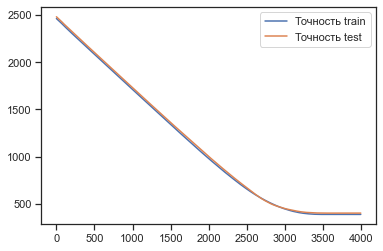

In [376]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на исходных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'linear'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train,y_train.iloc[:,1], 
                    epochs=4000, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [377]:
y_pred_2 = modelNN_y2.predict(X_test)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAENN_2)

7/7 [==============================] - 0s 998us/step
364.23807793133807


In [ ]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['NeuralNetwork',MAENN_1])
modelsMAE_y2.append(['NeuralNetwork',MAENN_2])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 16)                192       
                                                                 
 dense_70 (Dense)            (None, 32)                544       
                                                                 
 dense_71 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
23/23 - 0s - loss: 0.0615 - mae: 0.1933 - val_loss: 0.0411 - val_mae: 0.1671 - 491ms/epoch - 21ms/step
Epoch 2/120
23/23 - 0s - loss: 0.0321 - mae: 0.1437 - val_loss: 0.0254 - val_mae: 0.1254 - 57ms/epoch - 2ms/step
Epoch 3/120
23/23 - 0s - loss: 0.0289 - mae: 0.1360 - val_loss: 0.0263 - val_mae: 0.1293 - 

Epoch 66/120
23/23 - 0s - loss: 0.0284 - mae: 0.1357 - val_loss: 0.0254 - val_mae: 0.1268 - 38ms/epoch - 2ms/step
Epoch 67/120
23/23 - 0s - loss: 0.0285 - mae: 0.1358 - val_loss: 0.0253 - val_mae: 0.1265 - 39ms/epoch - 2ms/step
Epoch 68/120
23/23 - 0s - loss: 0.0283 - mae: 0.1352 - val_loss: 0.0252 - val_mae: 0.1263 - 38ms/epoch - 2ms/step
Epoch 69/120
23/23 - 0s - loss: 0.0283 - mae: 0.1354 - val_loss: 0.0251 - val_mae: 0.1259 - 39ms/epoch - 2ms/step
Epoch 70/120
23/23 - 0s - loss: 0.0282 - mae: 0.1354 - val_loss: 0.0249 - val_mae: 0.1249 - 38ms/epoch - 2ms/step
Epoch 71/120
23/23 - 0s - loss: 0.0284 - mae: 0.1354 - val_loss: 0.0267 - val_mae: 0.1319 - 39ms/epoch - 2ms/step
Epoch 72/120
23/23 - 0s - loss: 0.0286 - mae: 0.1359 - val_loss: 0.0289 - val_mae: 0.1382 - 42ms/epoch - 2ms/step
Epoch 73/120
23/23 - 0s - loss: 0.0287 - mae: 0.1359 - val_loss: 0.0258 - val_mae: 0.1283 - 38ms/epoch - 2ms/step
Epoch 74/120
23/23 - 0s - loss: 0.0284 - mae: 0.1357 - val_loss: 0.0252 - val_mae: 0.126

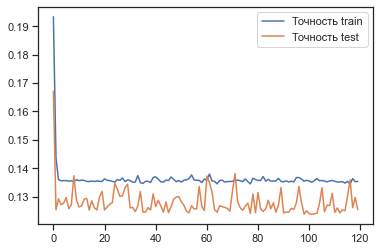

In [378]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=120, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                192       
                                                                 
 dense_73 (Dense)            (None, 32)                544       
                                                                 
 dense_74 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 - 1s - loss: 0.1273 - mae: 0.2941 - val_loss: 0.0351 - val_mae: 0.1463 - 556ms/epoch - 24ms/step
Epoch 2/200
23/23 - 0s - loss: 0.0352 - mae: 0.1503 - val_loss: 0.0343 - val_mae: 0.1438 - 54ms/epoch - 2ms/step
Epoch 3/200
23/23 - 0s - loss: 0.0310 - mae: 0.1398 - val_loss: 0.0343 - val_mae: 0.1421 - 

Epoch 66/200
23/23 - 0s - loss: 0.0298 - mae: 0.1374 - val_loss: 0.0343 - val_mae: 0.1445 - 38ms/epoch - 2ms/step
Epoch 67/200
23/23 - 0s - loss: 0.0299 - mae: 0.1380 - val_loss: 0.0343 - val_mae: 0.1431 - 42ms/epoch - 2ms/step
Epoch 68/200
23/23 - 0s - loss: 0.0300 - mae: 0.1379 - val_loss: 0.0341 - val_mae: 0.1432 - 40ms/epoch - 2ms/step
Epoch 69/200
23/23 - 0s - loss: 0.0301 - mae: 0.1381 - val_loss: 0.0341 - val_mae: 0.1436 - 40ms/epoch - 2ms/step
Epoch 70/200
23/23 - 0s - loss: 0.0298 - mae: 0.1374 - val_loss: 0.0341 - val_mae: 0.1434 - 39ms/epoch - 2ms/step
Epoch 71/200
23/23 - 0s - loss: 0.0300 - mae: 0.1378 - val_loss: 0.0341 - val_mae: 0.1438 - 40ms/epoch - 2ms/step
Epoch 72/200
23/23 - 0s - loss: 0.0302 - mae: 0.1384 - val_loss: 0.0342 - val_mae: 0.1432 - 41ms/epoch - 2ms/step
Epoch 73/200
23/23 - 0s - loss: 0.0304 - mae: 0.1388 - val_loss: 0.0341 - val_mae: 0.1434 - 39ms/epoch - 2ms/step
Epoch 74/200
23/23 - 0s - loss: 0.0299 - mae: 0.1378 - val_loss: 0.0342 - val_mae: 0.143

Epoch 138/200
23/23 - 0s - loss: 0.0302 - mae: 0.1385 - val_loss: 0.0339 - val_mae: 0.1431 - 40ms/epoch - 2ms/step
Epoch 139/200
23/23 - 0s - loss: 0.0299 - mae: 0.1381 - val_loss: 0.0339 - val_mae: 0.1438 - 42ms/epoch - 2ms/step
Epoch 140/200
23/23 - 0s - loss: 0.0302 - mae: 0.1374 - val_loss: 0.0340 - val_mae: 0.1442 - 38ms/epoch - 2ms/step
Epoch 141/200
23/23 - 0s - loss: 0.0295 - mae: 0.1374 - val_loss: 0.0340 - val_mae: 0.1431 - 38ms/epoch - 2ms/step
Epoch 142/200
23/23 - 0s - loss: 0.0296 - mae: 0.1375 - val_loss: 0.0339 - val_mae: 0.1432 - 39ms/epoch - 2ms/step
Epoch 143/200
23/23 - 0s - loss: 0.0303 - mae: 0.1400 - val_loss: 0.0348 - val_mae: 0.1439 - 38ms/epoch - 2ms/step
Epoch 144/200
23/23 - 0s - loss: 0.0305 - mae: 0.1399 - val_loss: 0.0342 - val_mae: 0.1432 - 39ms/epoch - 2ms/step
Epoch 145/200
23/23 - 0s - loss: 0.0298 - mae: 0.1375 - val_loss: 0.0339 - val_mae: 0.1432 - 38ms/epoch - 2ms/step
Epoch 146/200
23/23 - 0s - loss: 0.0296 - mae: 0.1370 - val_loss: 0.0339 - val_m

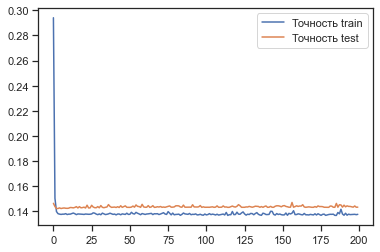

In [379]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на нормализованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'linear'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [380]:
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

7/7 [==============================] - 0s 3ms/step
2.4507417312911564
361.0299758304457


In [ ]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['NeuralNetwork',MAENN_1])
modelsMAE_y2.append(['NeuralNetwork',MAENN_2])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 16)                192       
                                                                 
 dense_76 (Dense)            (None, 32)                544       
                                                                 
 dense_77 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
23/23 - 1s - loss: 2.2083 - mae: 1.2184 - val_loss: 1.2743 - val_mae: 0.9144 - 933ms/epoch - 41ms/step
Epoch 2/120
23/23 - 0s - loss: 1.2704 - mae: 0.8989 - val_loss: 0.9359 - val_mae: 0.7504 - 42ms/epoch - 2ms/step
Epoch 3/120
23/23 - 0s - loss: 1.0384 - mae: 0.8134 - val_loss: 0.9261 - val_mae: 0.7608 - 

Epoch 66/120
23/23 - 0s - loss: 0.9976 - mae: 0.8036 - val_loss: 0.9135 - val_mae: 0.7655 - 40ms/epoch - 2ms/step
Epoch 67/120
23/23 - 0s - loss: 1.0002 - mae: 0.8039 - val_loss: 0.9082 - val_mae: 0.7617 - 40ms/epoch - 2ms/step
Epoch 68/120
23/23 - 0s - loss: 0.9980 - mae: 0.8034 - val_loss: 0.9126 - val_mae: 0.7648 - 39ms/epoch - 2ms/step
Epoch 69/120
23/23 - 0s - loss: 0.9993 - mae: 0.8040 - val_loss: 0.9080 - val_mae: 0.7620 - 40ms/epoch - 2ms/step
Epoch 70/120
23/23 - 0s - loss: 0.9992 - mae: 0.8033 - val_loss: 0.9093 - val_mae: 0.7627 - 41ms/epoch - 2ms/step
Epoch 71/120
23/23 - 0s - loss: 0.9990 - mae: 0.8034 - val_loss: 0.9122 - val_mae: 0.7649 - 41ms/epoch - 2ms/step
Epoch 72/120
23/23 - 0s - loss: 0.9993 - mae: 0.8035 - val_loss: 0.9064 - val_mae: 0.7610 - 39ms/epoch - 2ms/step
Epoch 73/120
23/23 - 0s - loss: 0.9977 - mae: 0.8033 - val_loss: 0.9108 - val_mae: 0.7638 - 41ms/epoch - 2ms/step
Epoch 74/120
23/23 - 0s - loss: 0.9973 - mae: 0.8029 - val_loss: 0.9060 - val_mae: 0.760

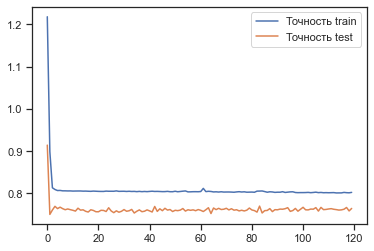

In [381]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на стандартизованных  данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_std,y_train_std.iloc[:,0], 
                    epochs=120, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 16)                192       
                                                                 
 dense_79 (Dense)            (None, 32)                544       
                                                                 
 dense_80 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 - 0s - loss: 1.0105 - mae: 0.7976 - val_loss: 1.1435 - val_mae: 0.8206 - 463ms/epoch - 20ms/step
Epoch 2/200
23/23 - 0s - loss: 1.0037 - mae: 0.7962 - val_loss: 1.1394 - val_mae: 0.8208 - 42ms/epoch - 2ms/step
Epoch 3/200
23/23 - 0s - loss: 1.0074 - mae: 0.7979 - val_loss: 1.1382 - val_mae: 0.8239 - 

Epoch 66/200
23/23 - 0s - loss: 0.9846 - mae: 0.7925 - val_loss: 1.1377 - val_mae: 0.8342 - 41ms/epoch - 2ms/step
Epoch 67/200
23/23 - 0s - loss: 0.9836 - mae: 0.7910 - val_loss: 1.1384 - val_mae: 0.8330 - 47ms/epoch - 2ms/step
Epoch 68/200
23/23 - 0s - loss: 0.9833 - mae: 0.7906 - val_loss: 1.1366 - val_mae: 0.8349 - 43ms/epoch - 2ms/step
Epoch 69/200
23/23 - 0s - loss: 0.9861 - mae: 0.7936 - val_loss: 1.1396 - val_mae: 0.8344 - 41ms/epoch - 2ms/step
Epoch 70/200
23/23 - 0s - loss: 0.9829 - mae: 0.7907 - val_loss: 1.1393 - val_mae: 0.8336 - 39ms/epoch - 2ms/step
Epoch 71/200
23/23 - 0s - loss: 0.9831 - mae: 0.7906 - val_loss: 1.1376 - val_mae: 0.8360 - 42ms/epoch - 2ms/step
Epoch 72/200
23/23 - 0s - loss: 0.9896 - mae: 0.7935 - val_loss: 1.1404 - val_mae: 0.8343 - 42ms/epoch - 2ms/step
Epoch 73/200
23/23 - 0s - loss: 0.9850 - mae: 0.7914 - val_loss: 1.1381 - val_mae: 0.8352 - 43ms/epoch - 2ms/step
Epoch 74/200
23/23 - 0s - loss: 0.9833 - mae: 0.7910 - val_loss: 1.1392 - val_mae: 0.835

Epoch 138/200
23/23 - 0s - loss: 0.9692 - mae: 0.7851 - val_loss: 1.1420 - val_mae: 0.8353 - 40ms/epoch - 2ms/step
Epoch 139/200
23/23 - 0s - loss: 0.9703 - mae: 0.7862 - val_loss: 1.1430 - val_mae: 0.8354 - 40ms/epoch - 2ms/step
Epoch 140/200
23/23 - 0s - loss: 0.9697 - mae: 0.7860 - val_loss: 1.1450 - val_mae: 0.8355 - 39ms/epoch - 2ms/step
Epoch 141/200
23/23 - 0s - loss: 0.9690 - mae: 0.7853 - val_loss: 1.1439 - val_mae: 0.8359 - 38ms/epoch - 2ms/step
Epoch 142/200
23/23 - 0s - loss: 0.9683 - mae: 0.7857 - val_loss: 1.1451 - val_mae: 0.8352 - 40ms/epoch - 2ms/step
Epoch 143/200
23/23 - 0s - loss: 0.9694 - mae: 0.7859 - val_loss: 1.1426 - val_mae: 0.8348 - 38ms/epoch - 2ms/step
Epoch 144/200
23/23 - 0s - loss: 0.9733 - mae: 0.7874 - val_loss: 1.1459 - val_mae: 0.8350 - 39ms/epoch - 2ms/step
Epoch 145/200
23/23 - 0s - loss: 0.9725 - mae: 0.7882 - val_loss: 1.1434 - val_mae: 0.8352 - 38ms/epoch - 2ms/step
Epoch 146/200
23/23 - 0s - loss: 0.9683 - mae: 0.7848 - val_loss: 1.1443 - val_m

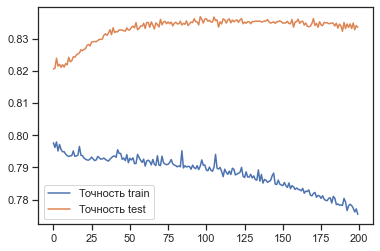

In [382]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на стандартизованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'linear'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_std,y_train_std.iloc[:,1], 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [384]:
y_pred_1 = modelNN_y1.predict(X_test_std)
y_pred_2 = modelNN_y2.predict(X_test_std)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_std_y.inverse_transform (y_pred)


MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

7/7 [==============================] - 0s 1ms/step
2.456168041749251
360.95387288410035


In [ ]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['NeuralNetwork',MAENN_1])
modelsMAE_y2.append(['NeuralNetwork',MAENN_2])

In [385]:
modelsMAE_y1

[['LinearRegression', 3.2148518086102125],
 ['Ridge', 2.4542051769516413],
 ['Lasso', 2.452590505439797],
 ['ElasticNet', 2.4525476151577124],
 ['BayesianRidge', 2.454319535374178],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.526131102254825],
 ['GradientBoostingRegressor', 2.4995220645582243],
 ['KNeighborsRegressor', 2.530224405484154],
 ['DecisionTreeRegressor', 2.5179034756745784],
 ['AdaBoostRegressor', 2.6184424264136497]]

In [386]:
modelsMAE_y2

[['LinearRegression', 494.3894542946835],
 ['Ridge', 362.77588752747084],
 ['Lasso', 363.54454610061686],
 ['ElasticNet', 363.52495016846393],
 ['BayesianRidge', 364.07105847820554],
 ['GradientBoostingRegressor', 379.66515146267443],
 ['GradientBoostingRegressor', 379.95942413421955],
 ['GradientBoostingRegressor', 379.4405608657931],
 ['GradientBoostingRegressor', 380.1926462641899],
 ['GradientBoostingRegressor', 381.0316488725697],
 ['KNeighborsRegressor', 379.39092139525184],
 ['DecisionTreeRegressor', 2397.392219603602],
 ['AdaBoostRegressor', 2.6184424264136497]]

In [355]:
modelsMAE_y2

[['LinearRegression', 494.3894542946835],
 ['Ridge', 362.77588752747084],
 ['Lasso', 363.54454610061686],
 ['ElasticNet', 363.52495016846393],
 ['BayesianRidge', 364.07105847820554],
 ['GradientBoostingRegressor', 379.66515146267443],
 ['GradientBoostingRegressor', 379.95942413421955],
 ['GradientBoostingRegressor', 379.4405608657931],
 ['GradientBoostingRegressor', 380.1926462641899],
 ['GradientBoostingRegressor', 381.0316488725697],
 ['KNeighborsRegressor', 379.39092139525184],
 ['DecisionTreeRegressor', 2397.392219603602],
 ['AdaBoostRegressor', 2.6184424264136497]]